In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(cowplot)

options(repr.plot.width = 12, repr.plot.height = 7.5, repr.plot.res = 200)
options(warn = -1)

rds_path <- list.files(pattern = "*.RDS")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
xen <- readRDS(rds_path)
xen[["cell_id"]] <- rownames(xen[[]])
xen

An object of class Seurat 
541 features across 36602 samples within 4 assays 
Active assay: Xenium (248 features, 0 variable features)
 1 layer present: counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: xenium_pca, xenium_umap
 1 spatial field of view present: fov

In [3]:
cluster_order <- sort(unique(xen[[]]$xenium_clusters), na.last = TRUE)
xen[[]]$xenium_clusters <- factor(xen[[]]$xenium_clusters, levels = cluster_order)
Idents(xen) <- "xenium_clusters"

In [4]:
xen[["segmentation_method"]][xen[["segmentation_method"]] == "Segmented by boundary stain (ATP1A1+CD45+E-Cadherin)"] <- "E-Cad"
xen[["segmentation_method"]][xen[["segmentation_method"]] == "Segmented by boundary stain at 0.25x (ATP1A1+CD45+E-Cadherin)"] <- "0.25x E-Cad"
xen[["segmentation_method"]][xen[["segmentation_method"]] == "Segmented by interior stain (18S)"] <- "18s"
xen[["segmentation_method"]][xen[["segmentation_method"]] == "Segmented by nucleus expansion of 5.0µm"] <- "Nucleus Exp."
plt_df <- xen[[]]
table(plt_df[["segmentation_method"]])


 cell 
36602 

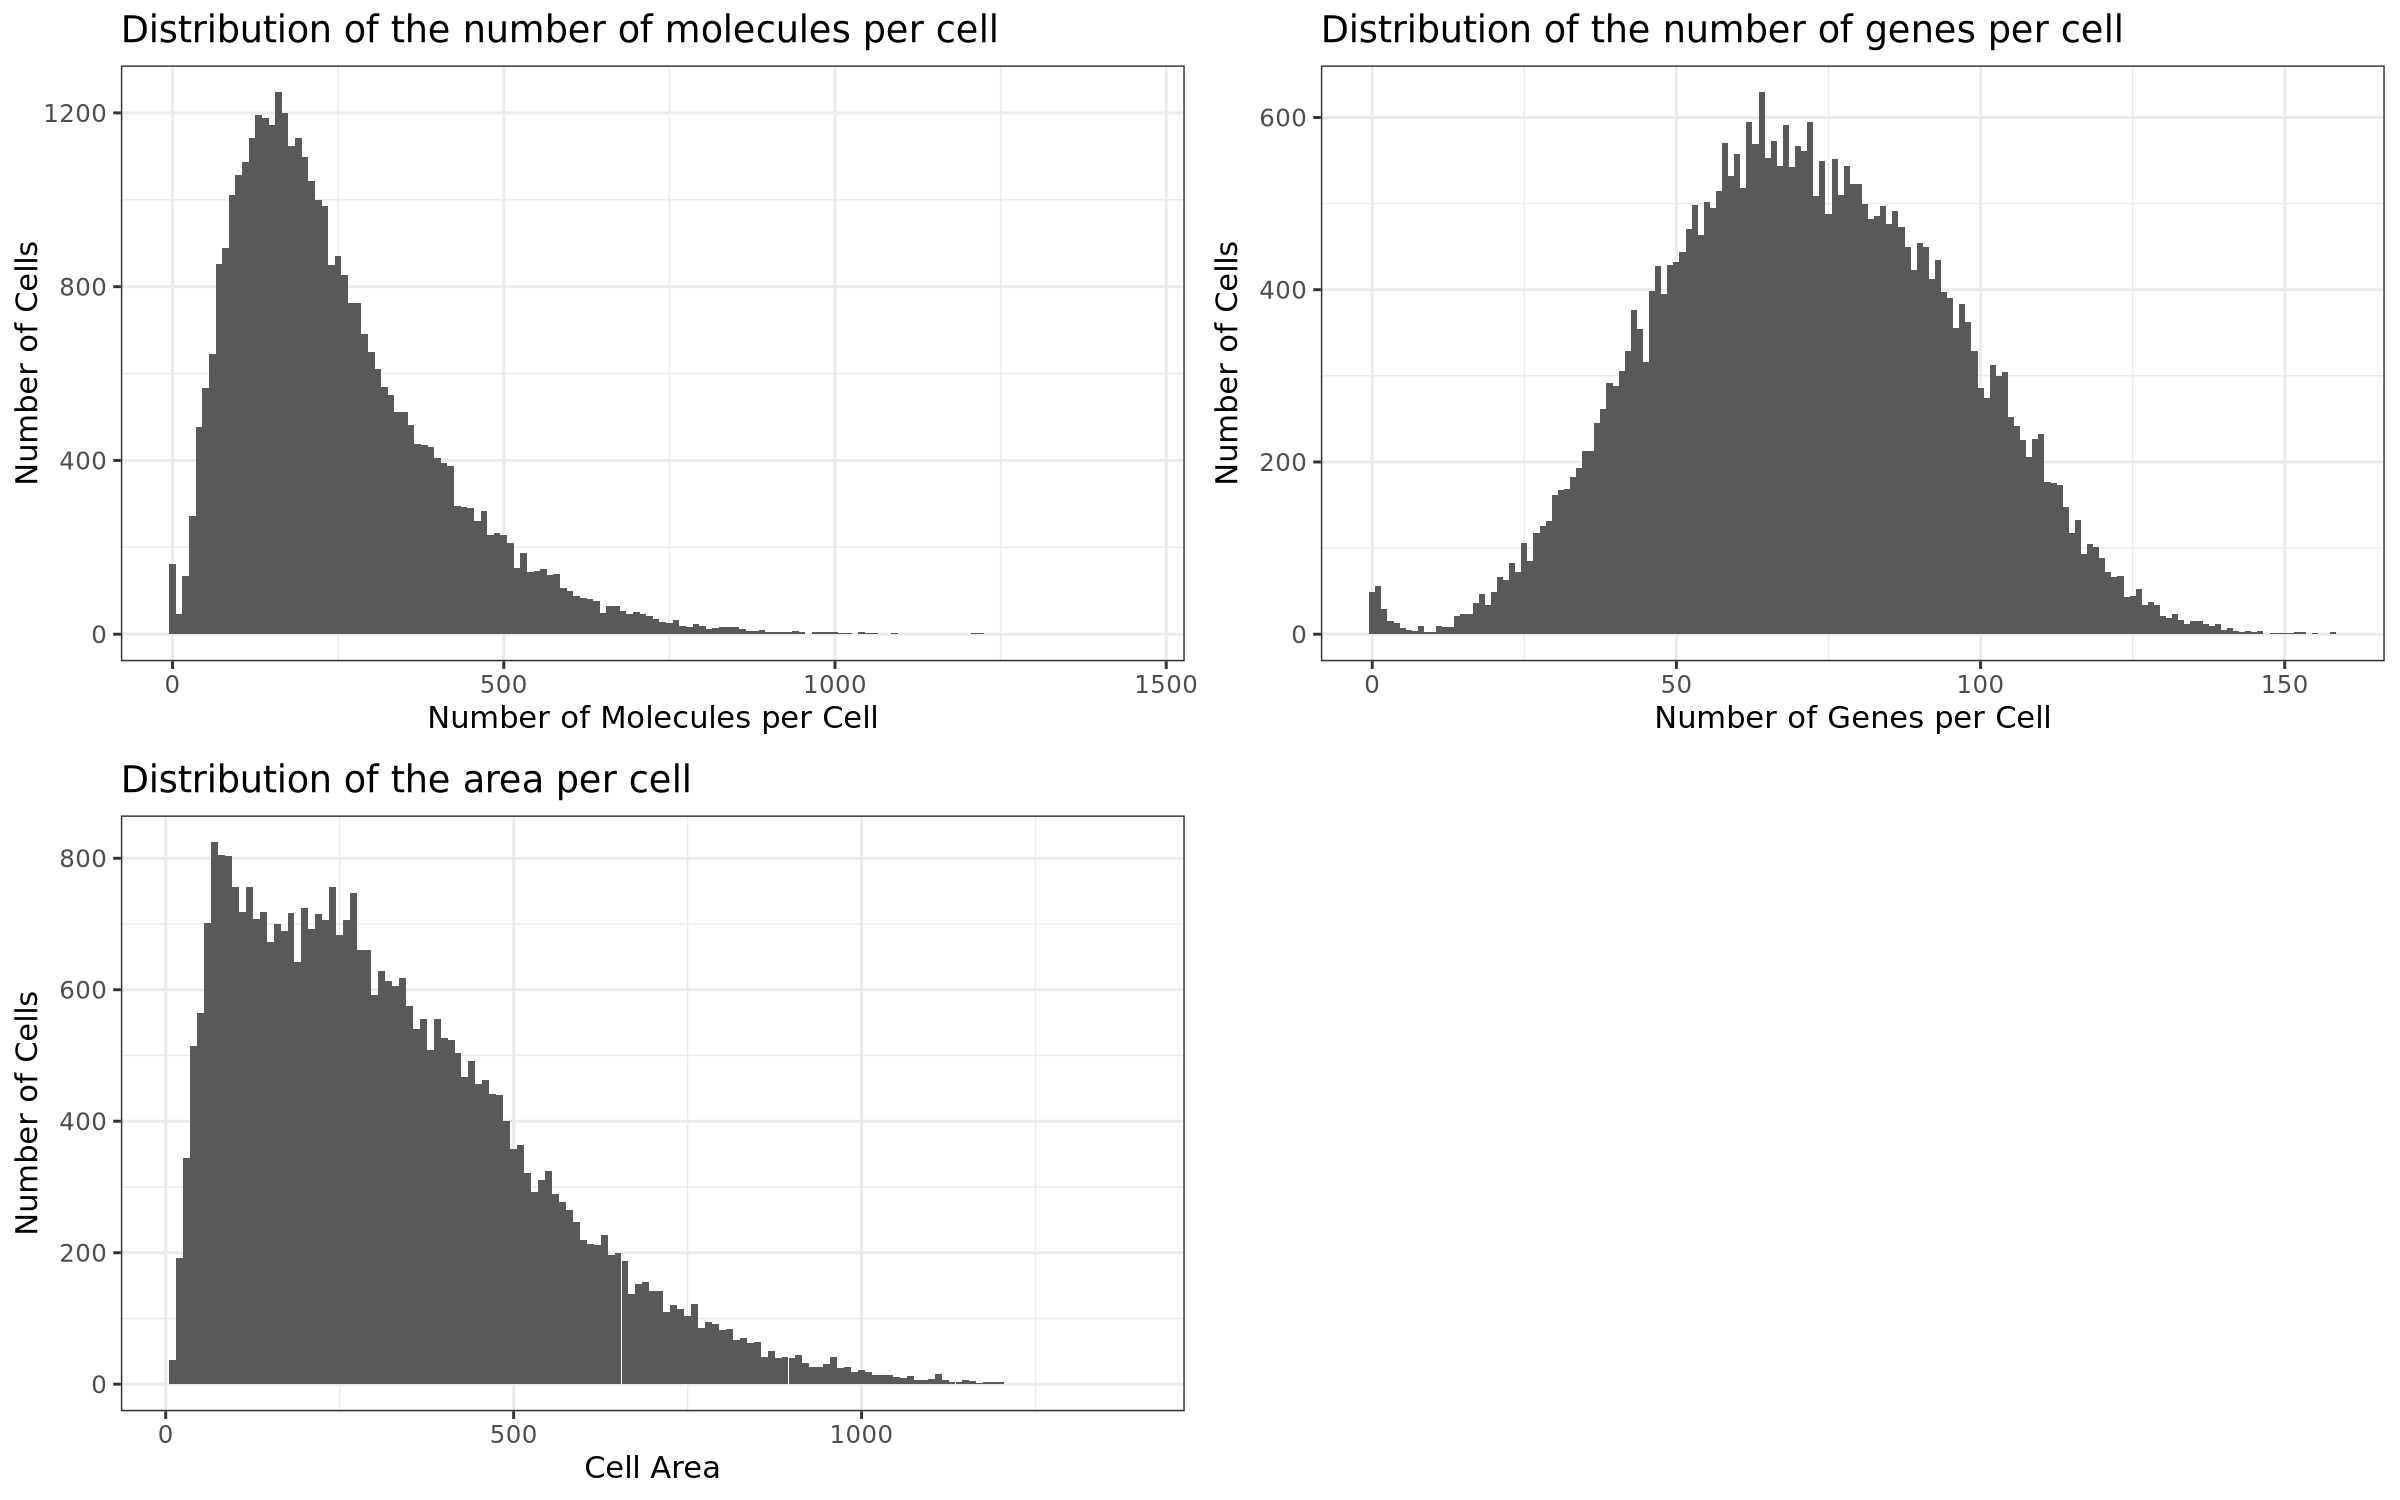

In [5]:
plt_df <- plt_df[sample(nrow(plt_df)), ]

p1 <- ggplot(plt_df, aes(x = nCount_Xenium)) + geom_histogram(binwidth = 10) + theme_bw() +
    labs(title = "Distribution of the number of molecules per cell") +
    xlab("Number of Molecules per Cell") + ylab("Number of Cells")

p2 <- ggplot(plt_df, aes(x = nFeature_Xenium)) + geom_histogram(binwidth = 1) + theme_bw() +
    labs(title = "Distribution of the number of genes per cell") +
    xlab("Number of Genes per Cell") + ylab("Number of Cells")

p3 <- ggplot(plt_df, aes(x = cell_area)) + geom_histogram(binwidth = 10) + theme_bw() +
    labs(title = "Distribution of the area per cell") +
    xlab("Cell Area") + ylab("Number of Cells")

plot_grid(p1, p2, p3, align = "vh")

Scatter plot of the number of molecules per cell vs. the number of genes detected per cell. Points represent individual cells and colored by either cluster ID or segmentation method. 

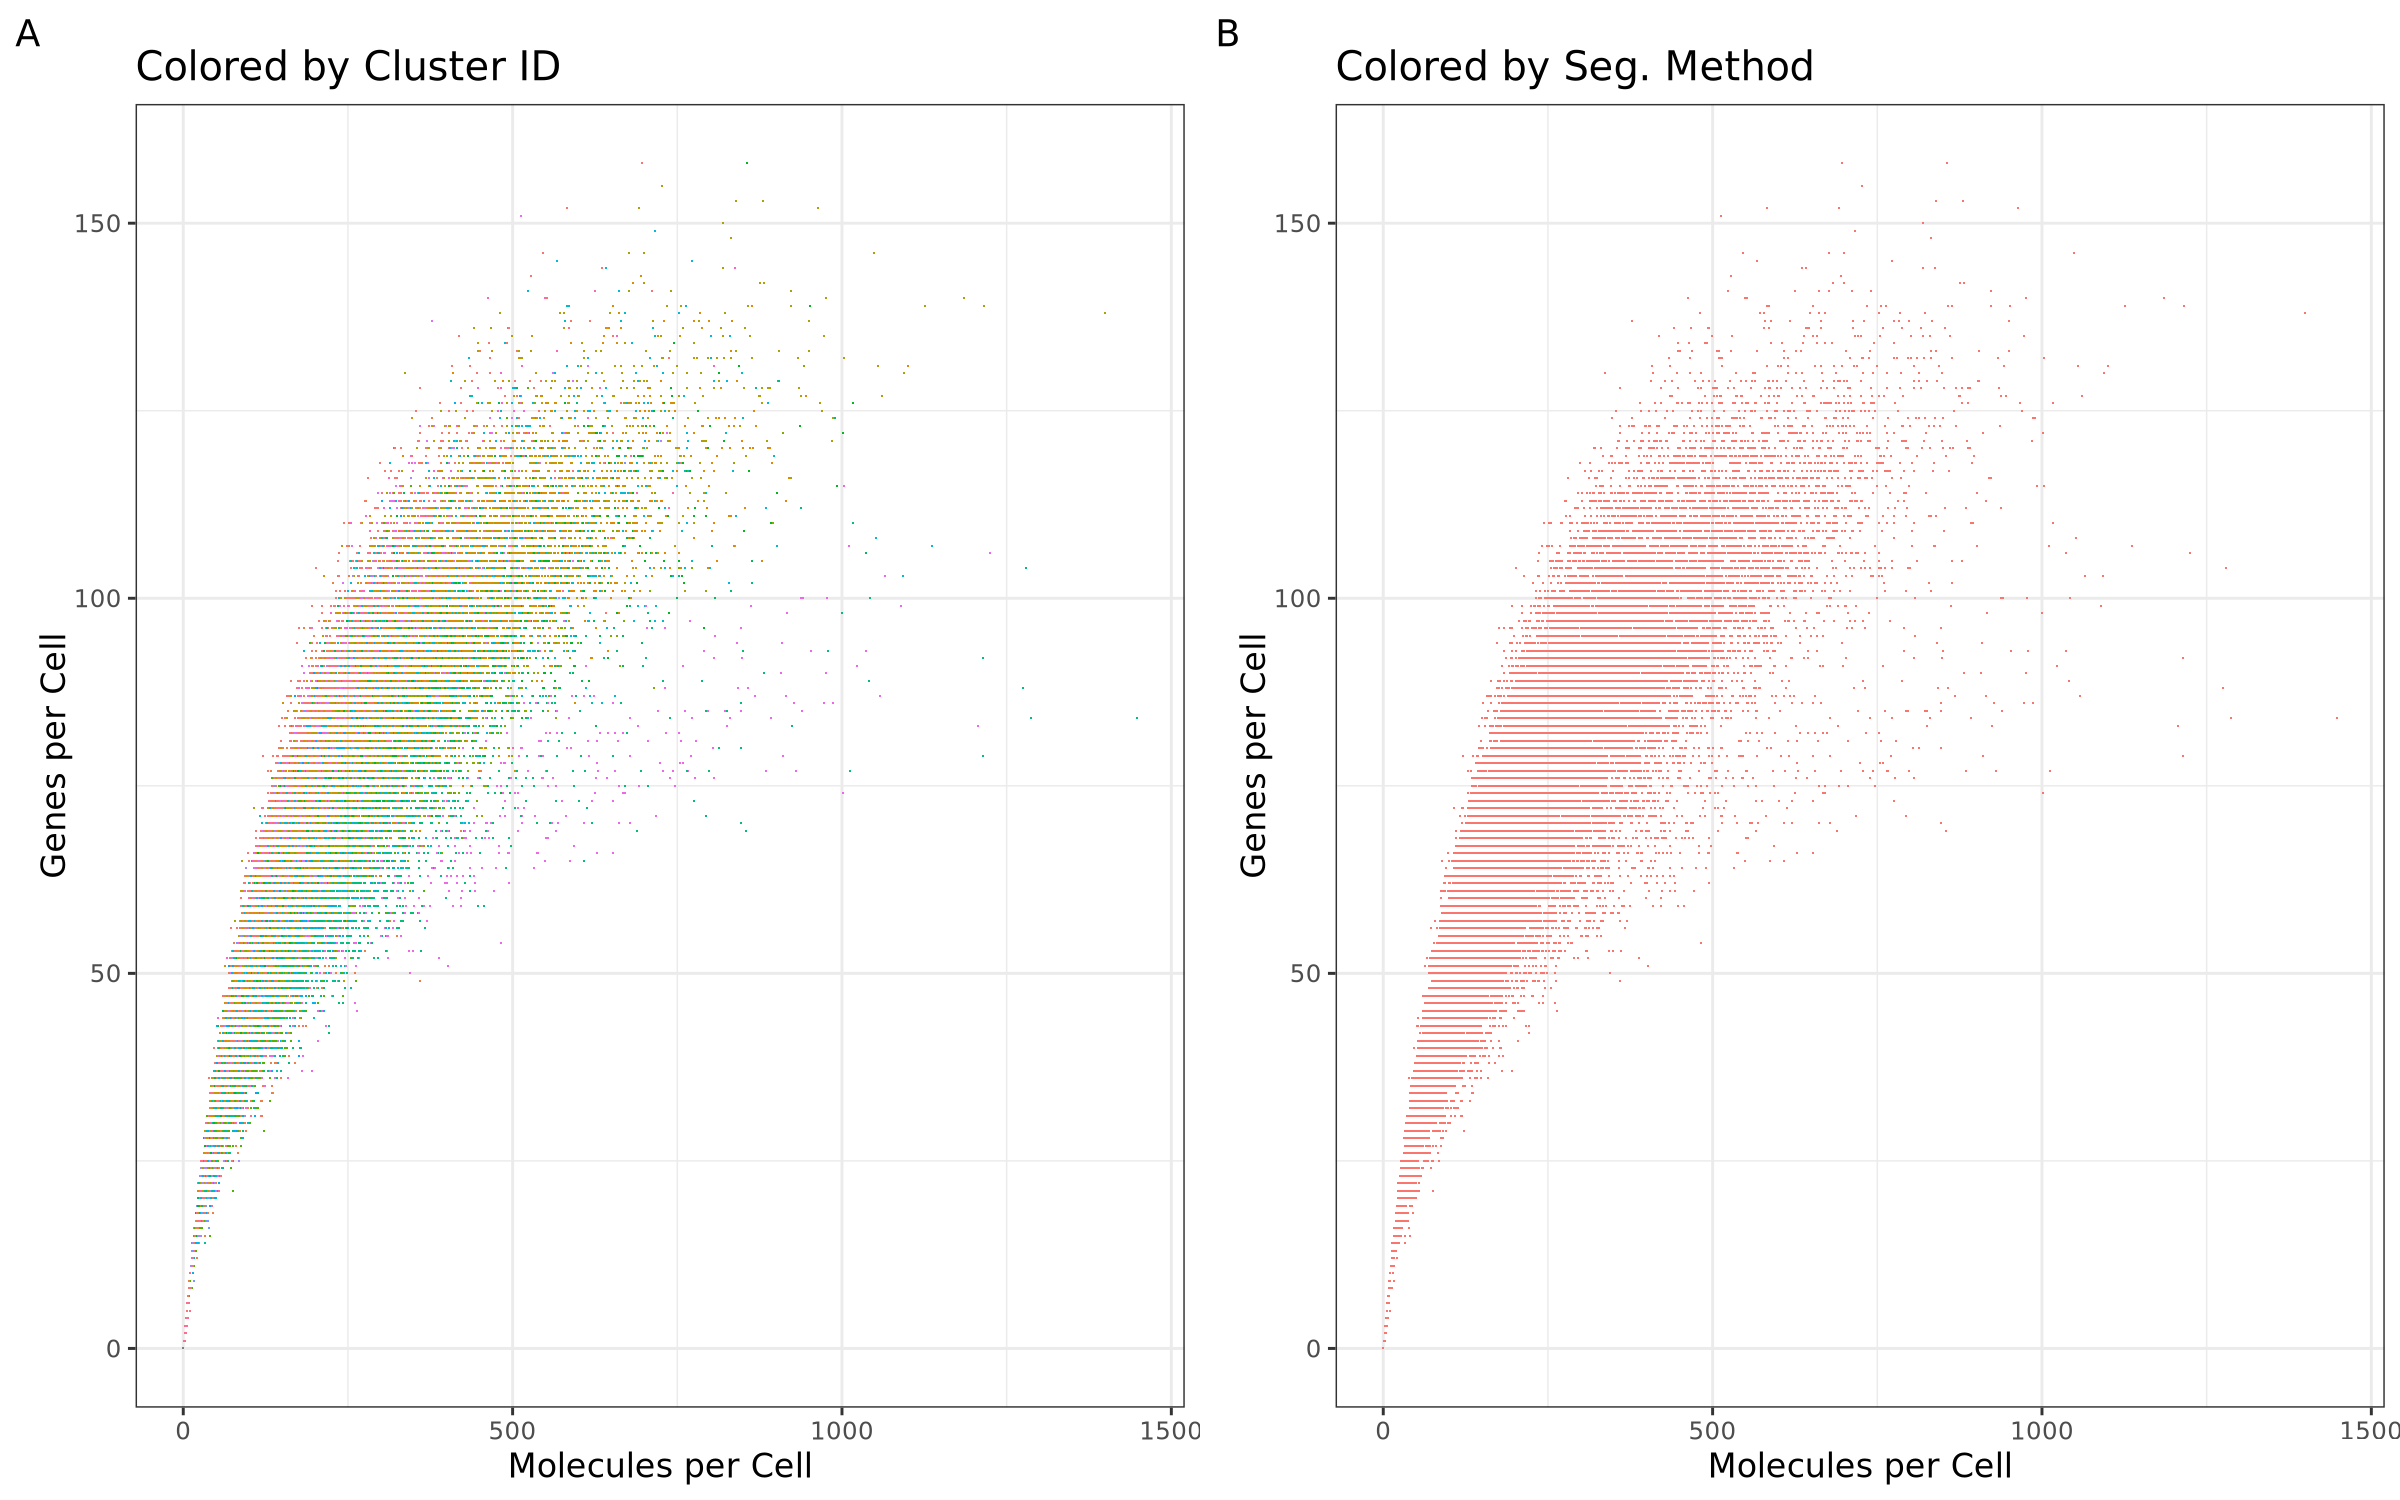

In [18]:
plt_df <- plt_df[sample(nrow(plt_df)), ]

p1 <- ggplot(plt_df, aes(x = nCount_Xenium, y = nFeature_Xenium, color = xenium_clusters)) + geom_point(shape = ".") +
  xlab("Molecules per Cell") + ylab("Genes per Cell") + labs(title = "Colored by Cluster ID", tag = "A") + theme_bw() +
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) +
  theme(
    legend.position = "none", 
    legend.key = element_rect(colour = NA, fill = NA),
    legend.key.size = unit(10, "pt"),
    legend.key.spacing.x = unit(5, "pt"),
    legend.key.spacing.y = unit(5, "pt"),
    legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
    legend.title = element_blank(),
    title = element_text(size = 12)
  )

p2 <- ggplot(plt_df, aes(x = nCount_Xenium, y = nFeature_Xenium, color = segmentation_method)) + geom_point(shape = ".") +
  xlab("Molecules per Cell") + ylab("Genes per Cell") + labs(title = "Colored by Seg. Method", tag = "B") + theme_bw() +
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) +
  theme(
    legend.position = "none",
    legend.key = element_rect(colour = NA, fill = NA),
    legend.key.size = unit(10, "pt"),
    legend.key.spacing.x = unit(5, "pt"),
    legend.key.spacing.y = unit(5, "pt"),
    legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
    legend.title = element_blank(),
    title = element_text(size = 12)
)

plot_grid(p1, p2, ncol=2, align = 'vh')

Scatter plot of the area per cell vs. the number of genes detected per cell. Individual points represent cells and are colored by either cluster ID or segmentation method. 

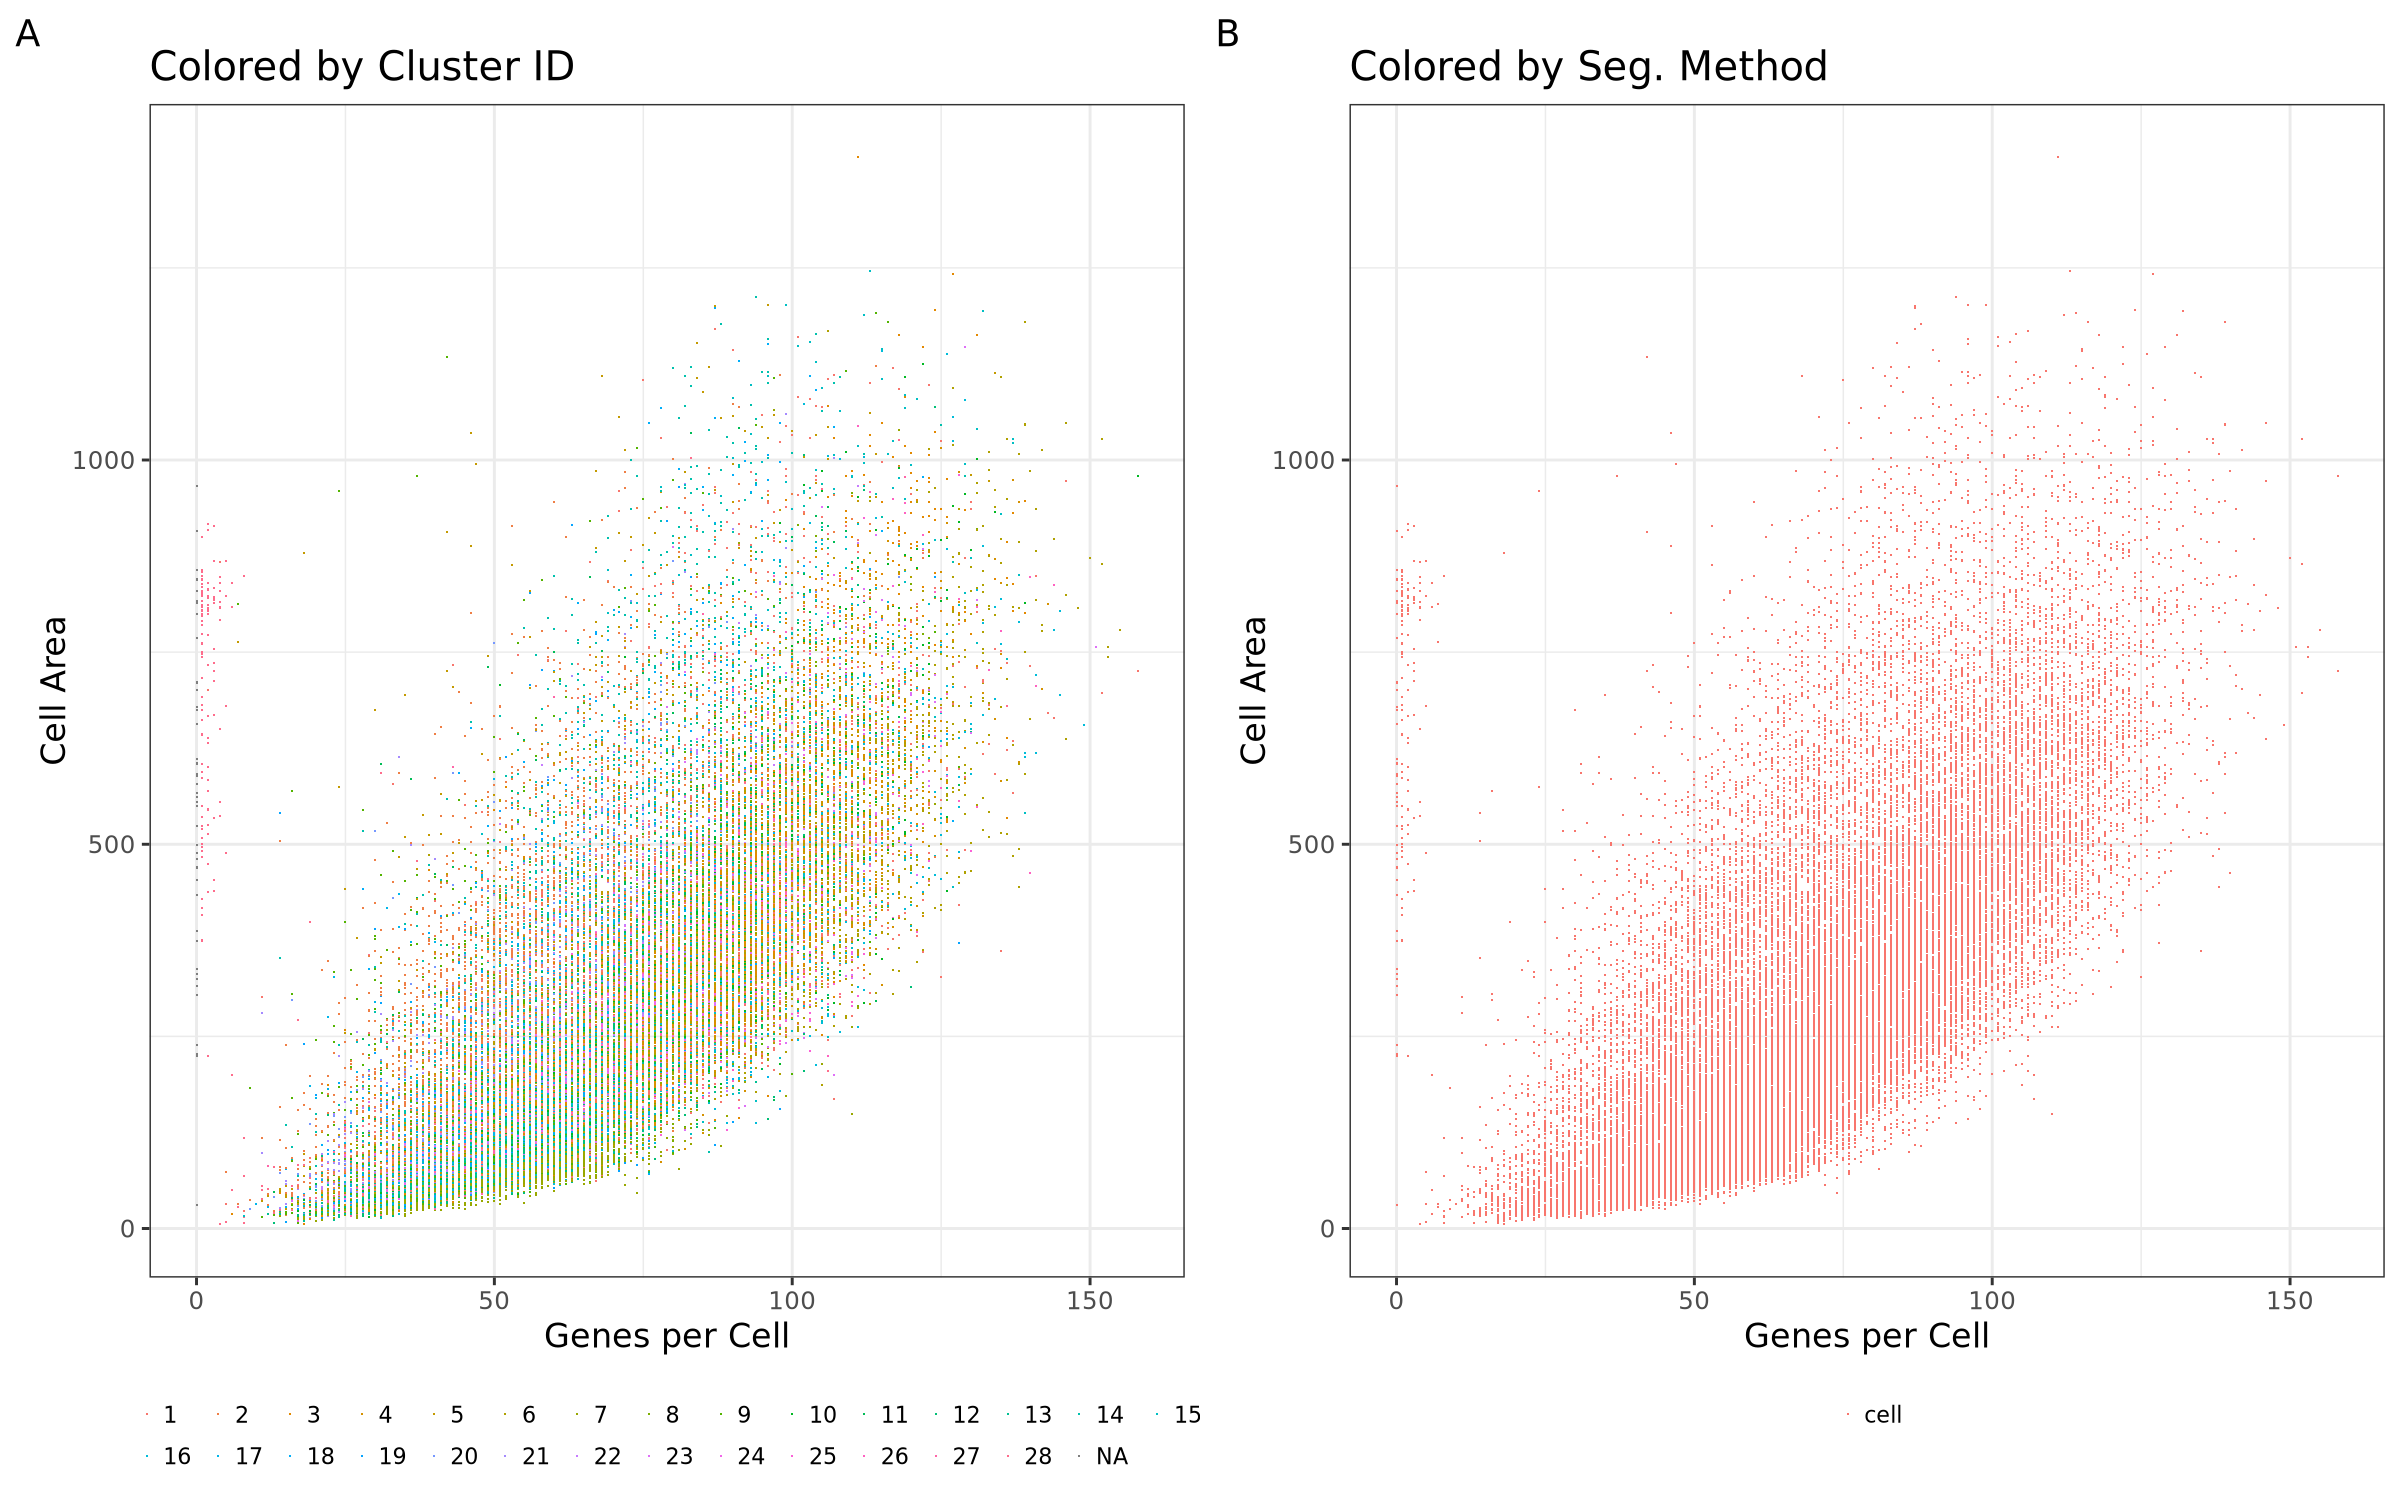

In [17]:
plt_df <- plt_df[sample(nrow(plt_df)), ]

p1 <- ggplot(plt_df, aes(x = nFeature_Xenium, y = cell_area, color = xenium_clusters)) + geom_point(shape = ".") +
  xlab("Genes per Cell") + ylab("Cell Area") + labs(title = "Colored by Cluster ID", tag = "A") + theme_bw() +
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) +
  theme(
    legend.position = "bottom",
    legend.key = element_rect(colour = NA, fill = NA),
    legend.key.size = unit(10, "pt"),
    legend.key.spacing.x = unit(5, "pt"),
    legend.key.spacing.y = unit(5, "pt"),
    legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
    legend.title = element_blank(),
    title = element_text(size = 12)
  )

p2 <- ggplot(plt_df, aes(x = nFeature_Xenium, y = cell_area, color = segmentation_method)) + geom_point(shape = ".") +
  xlab("Genes per Cell") + ylab("Cell Area") + labs(title = "Colored by Seg. Method", tag = "B") + theme_bw() +
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) +
  theme(
    legend.position = "bottom",
    legend.key = element_rect(colour = NA, fill = NA),
    legend.key.size = unit(10, "pt"),
    legend.key.spacing.x = unit(5, "pt"),
    legend.key.spacing.y = unit(5, "pt"),
    legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
    legend.title = element_blank(),
    title = element_text(size = 12)
  )

plot_grid(p1, p2, ncol=2, align = 'vh')

Scatter plot of the area per cell vs. the number of molecules per cell. Individual points represent cells and are colored by either cluster ID or segmentation method. 

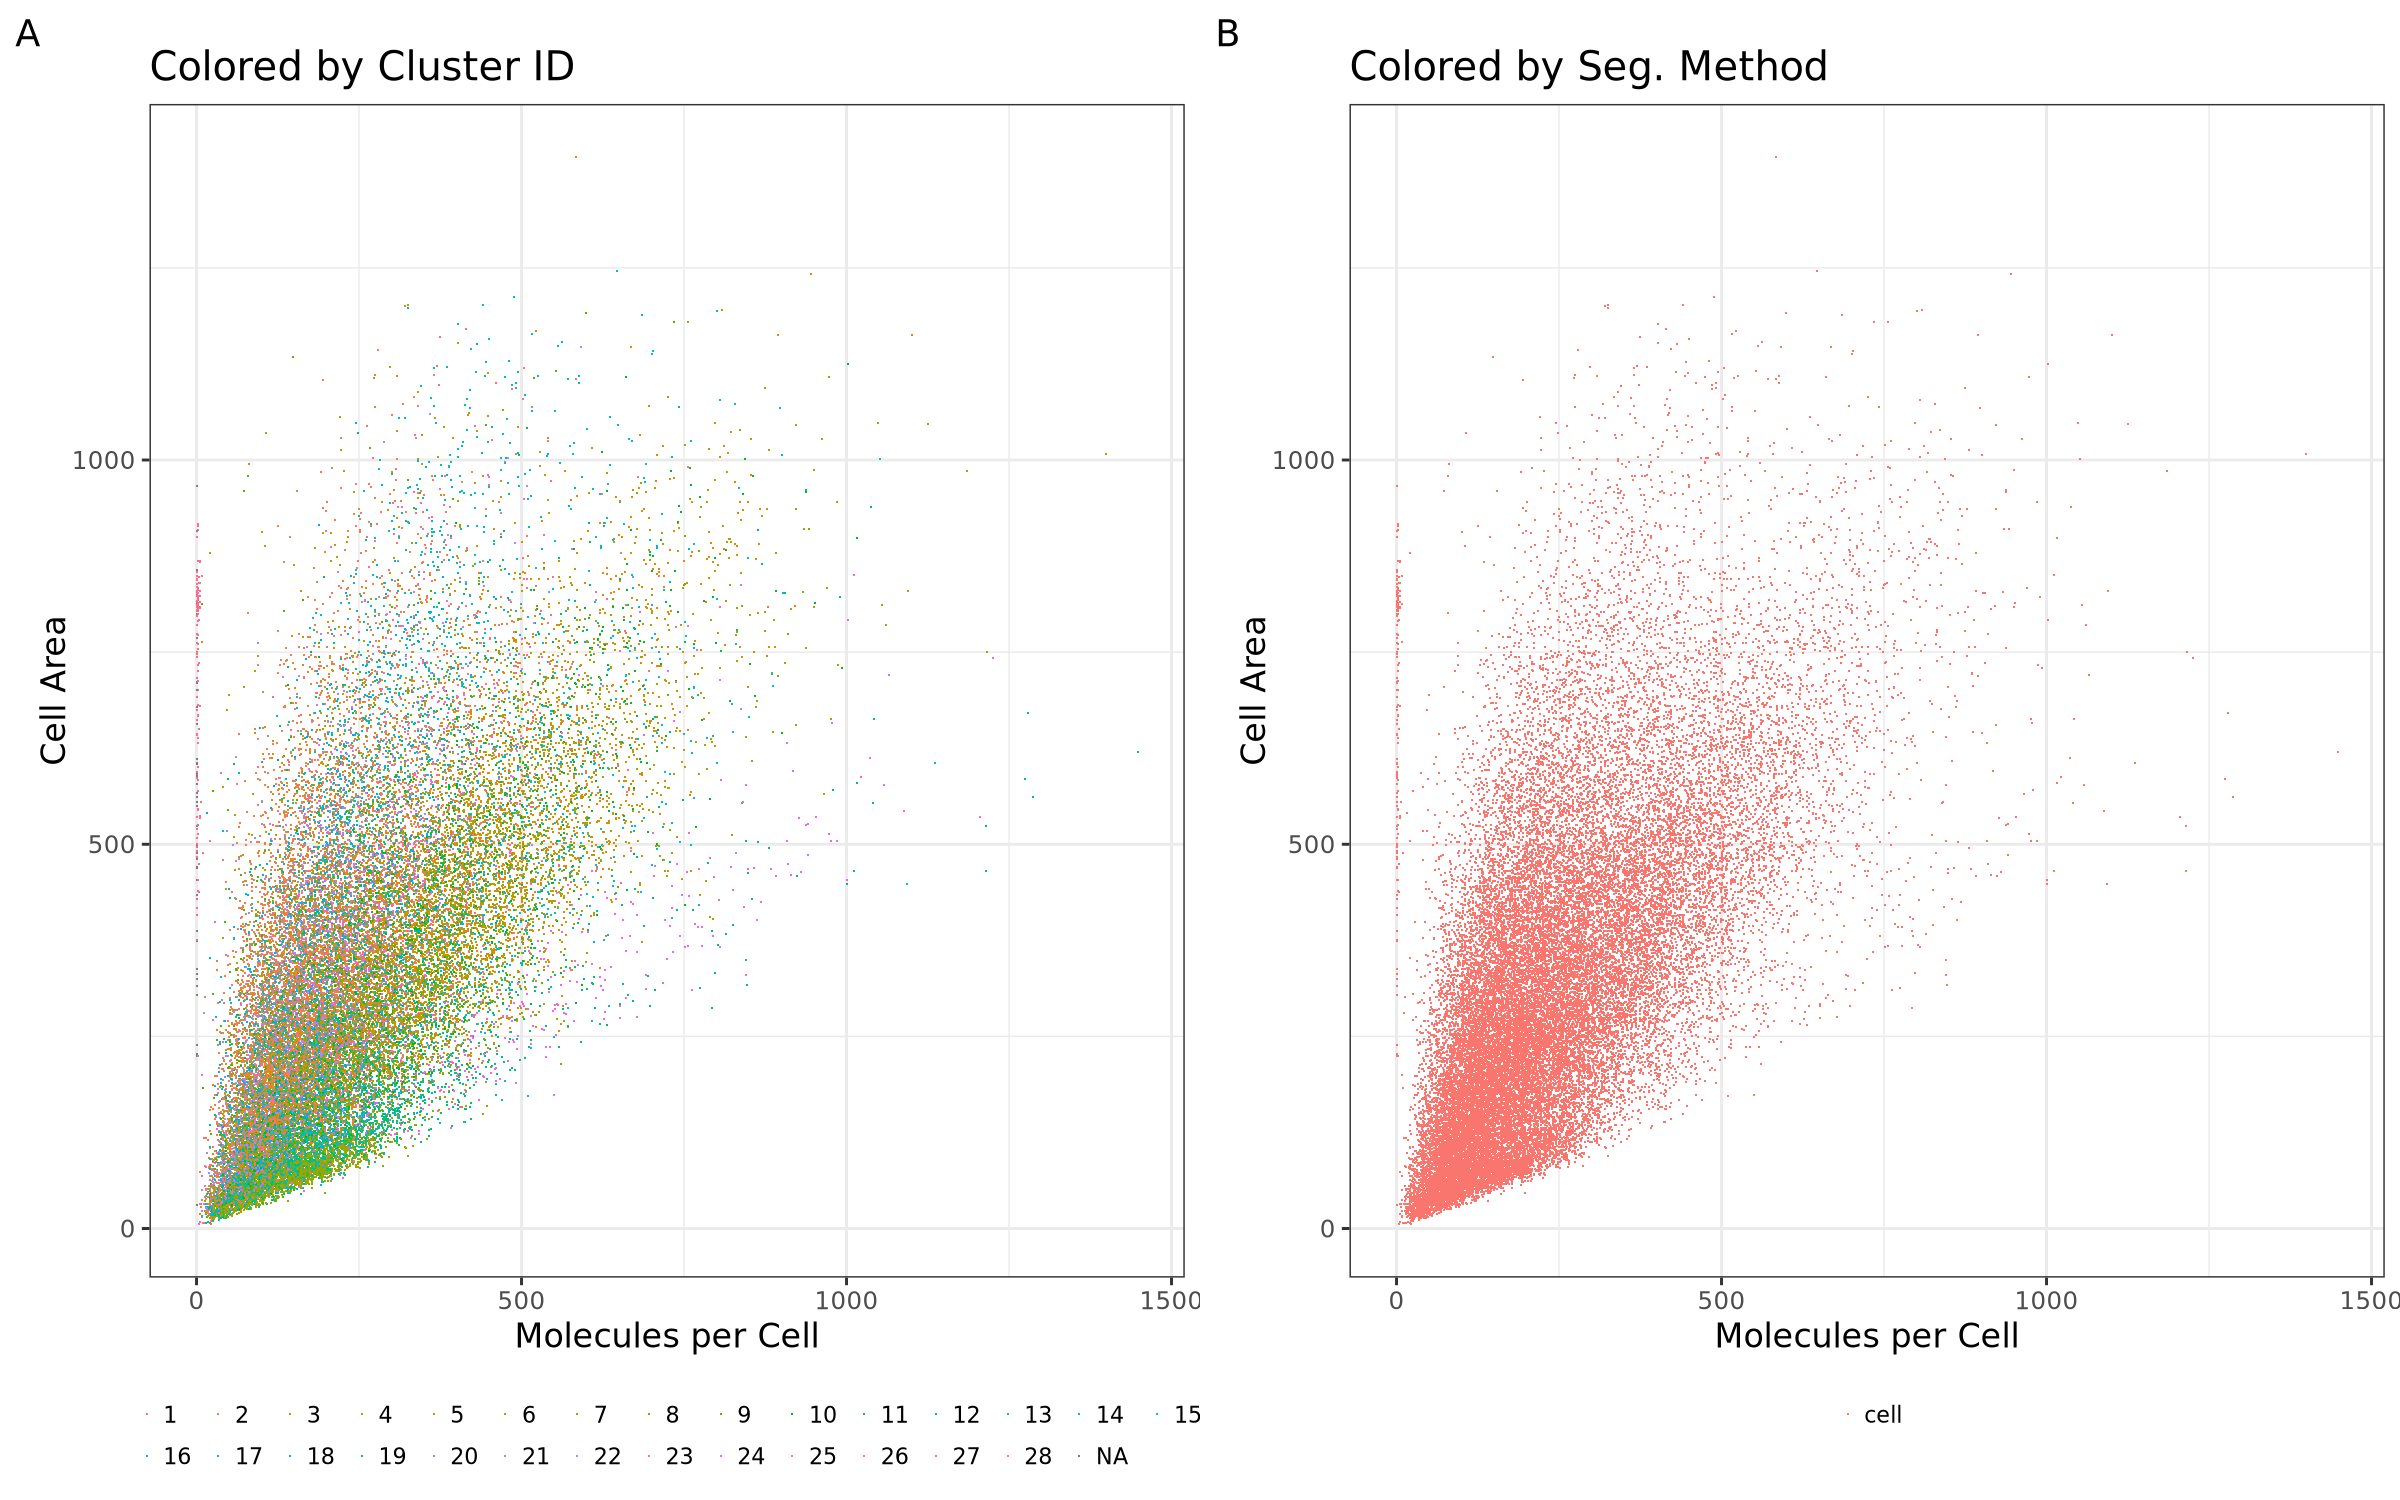

In [16]:
plt_df <- plt_df[sample(nrow(plt_df)), ]

p1 <- ggplot(plt_df, aes(x = nCount_Xenium, y = cell_area, color = xenium_clusters)) + geom_point(shape = ".") +
  xlab("Molecules per Cell") + ylab("Cell Area") + labs(title = "Colored by Cluster ID", tag = "A") + theme_bw() +
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) +
  theme(
    legend.position = "bottom",
    legend.key = element_rect(colour = NA, fill = NA),
    legend.key.size = unit(10, "pt"),
    legend.key.spacing.x = unit(5, "pt"),
    legend.key.spacing.y = unit(5, "pt"),
    legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
    legend.title = element_blank(),
    title = element_text(size = 12)
  )

p2 <- ggplot(plt_df, aes(x = nCount_Xenium, y = cell_area, color = segmentation_method)) + geom_point(shape = ".") +
  xlab("Molecules per Cell") + ylab("Cell Area") + labs(title = "Colored by Seg. Method", tag = "B") + theme_bw() + 
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) +
  theme(
    legend.position = "bottom",
    legend.key = element_rect(colour = NA, fill = NA),
    legend.key.size = unit(10, "pt"),
    legend.key.spacing.x = unit(5, "pt"),
    legend.key.spacing.y = unit(5, "pt"),
    legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
    legend.title = element_blank(),
    title = element_text(size = 12)
  )

plot_grid(p1, p2, ncol=2, align = 'vh')

Violin plots of the area per cell, number of molecules per cell, and the number of genes per cell for each cluster.

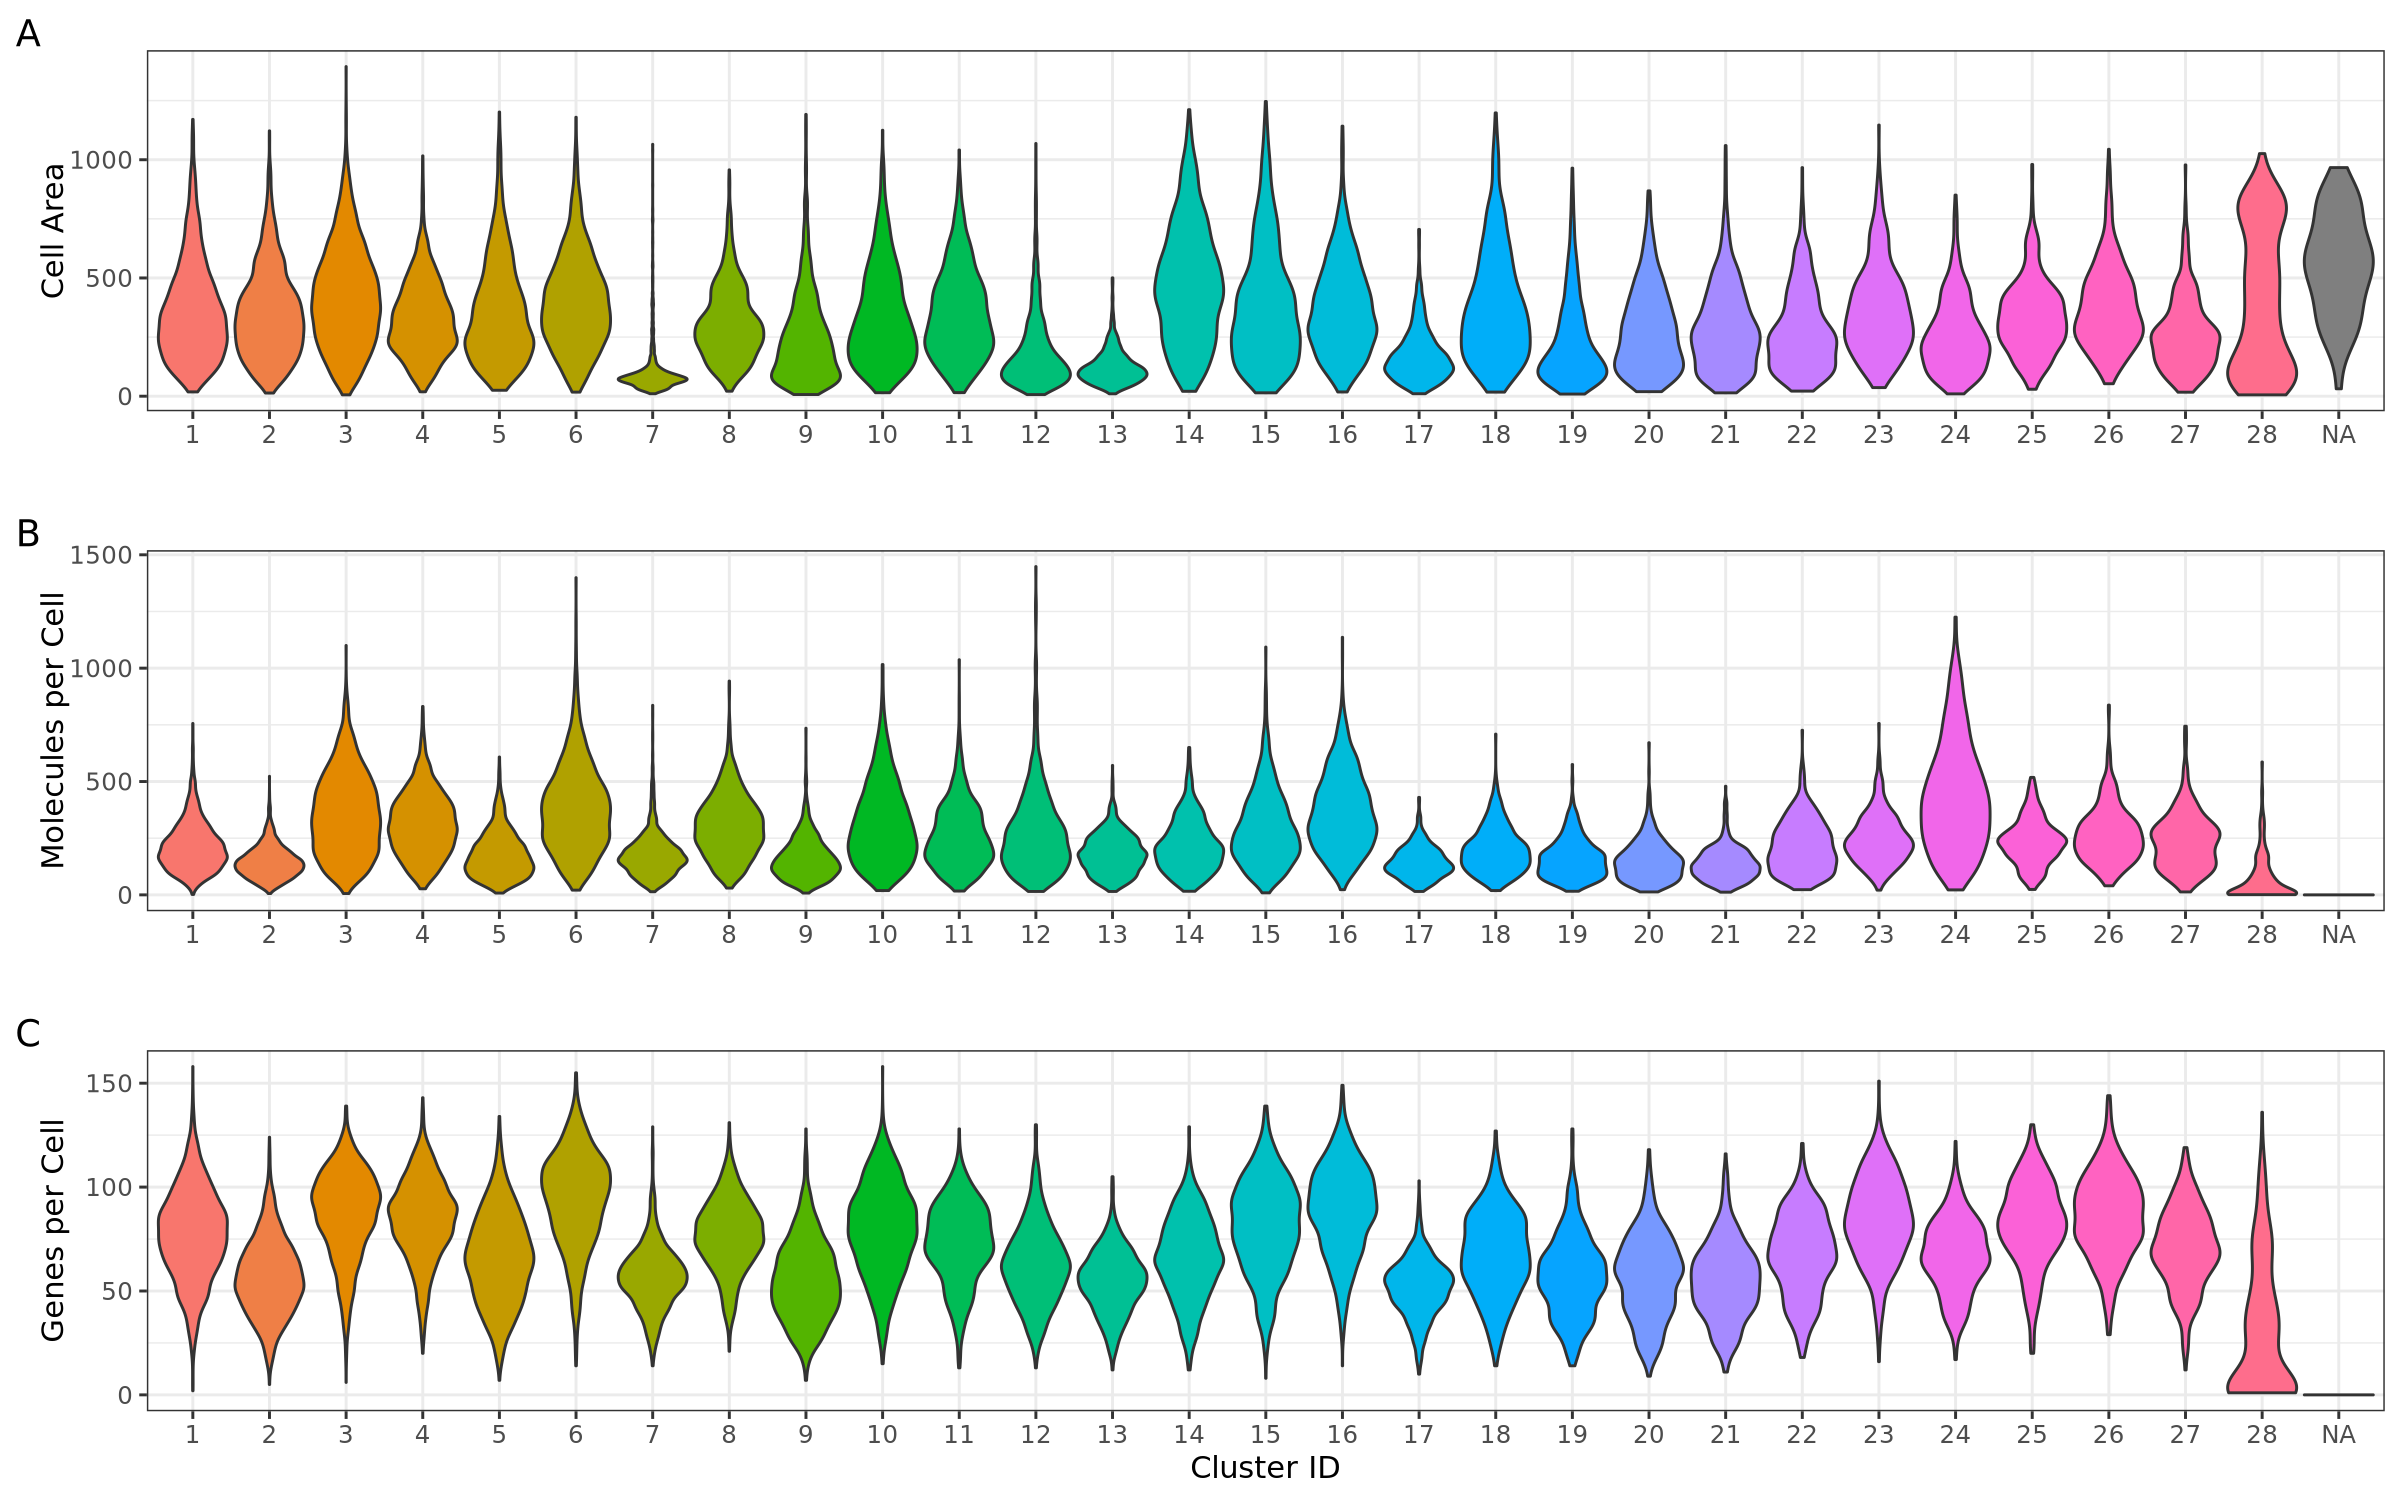

In [9]:
p1 <- ggplot(plt_df, aes(x = xenium_clusters, y = cell_area, fill = xenium_clusters)) + geom_violin(scale = "width") +
  xlab("Cluster ID") + ylab("Cell Area") + labs(tag = "A") + theme_bw()
p2 <- ggplot(plt_df, aes(x = xenium_clusters, y = nCount_Xenium, fill = xenium_clusters)) + geom_violin(scale = "width") +
  xlab("Cluster ID") + ylab("Molecules per Cell") + labs(tag = "B") + theme_bw()
p3 <- ggplot(plt_df, aes(x = xenium_clusters, y = nFeature_Xenium, fill = xenium_clusters)) + geom_violin(scale = "width") +
  xlab("Cluster ID") + ylab("Genes per Cell") + labs(tag = "C") + theme_bw()

plot_grid(
  p1 + theme(legend.position = "none", axis.title.x = element_blank()),
  p2 + theme(legend.position = "none", axis.title.x = element_blank()),
  p3 + theme(legend.position = "none"), 
  ncol=1, 
  align = 'vh'
)

Violin plots of the area per cell, number of molecules per cell, and the number of genes per cell for each segmentation method.

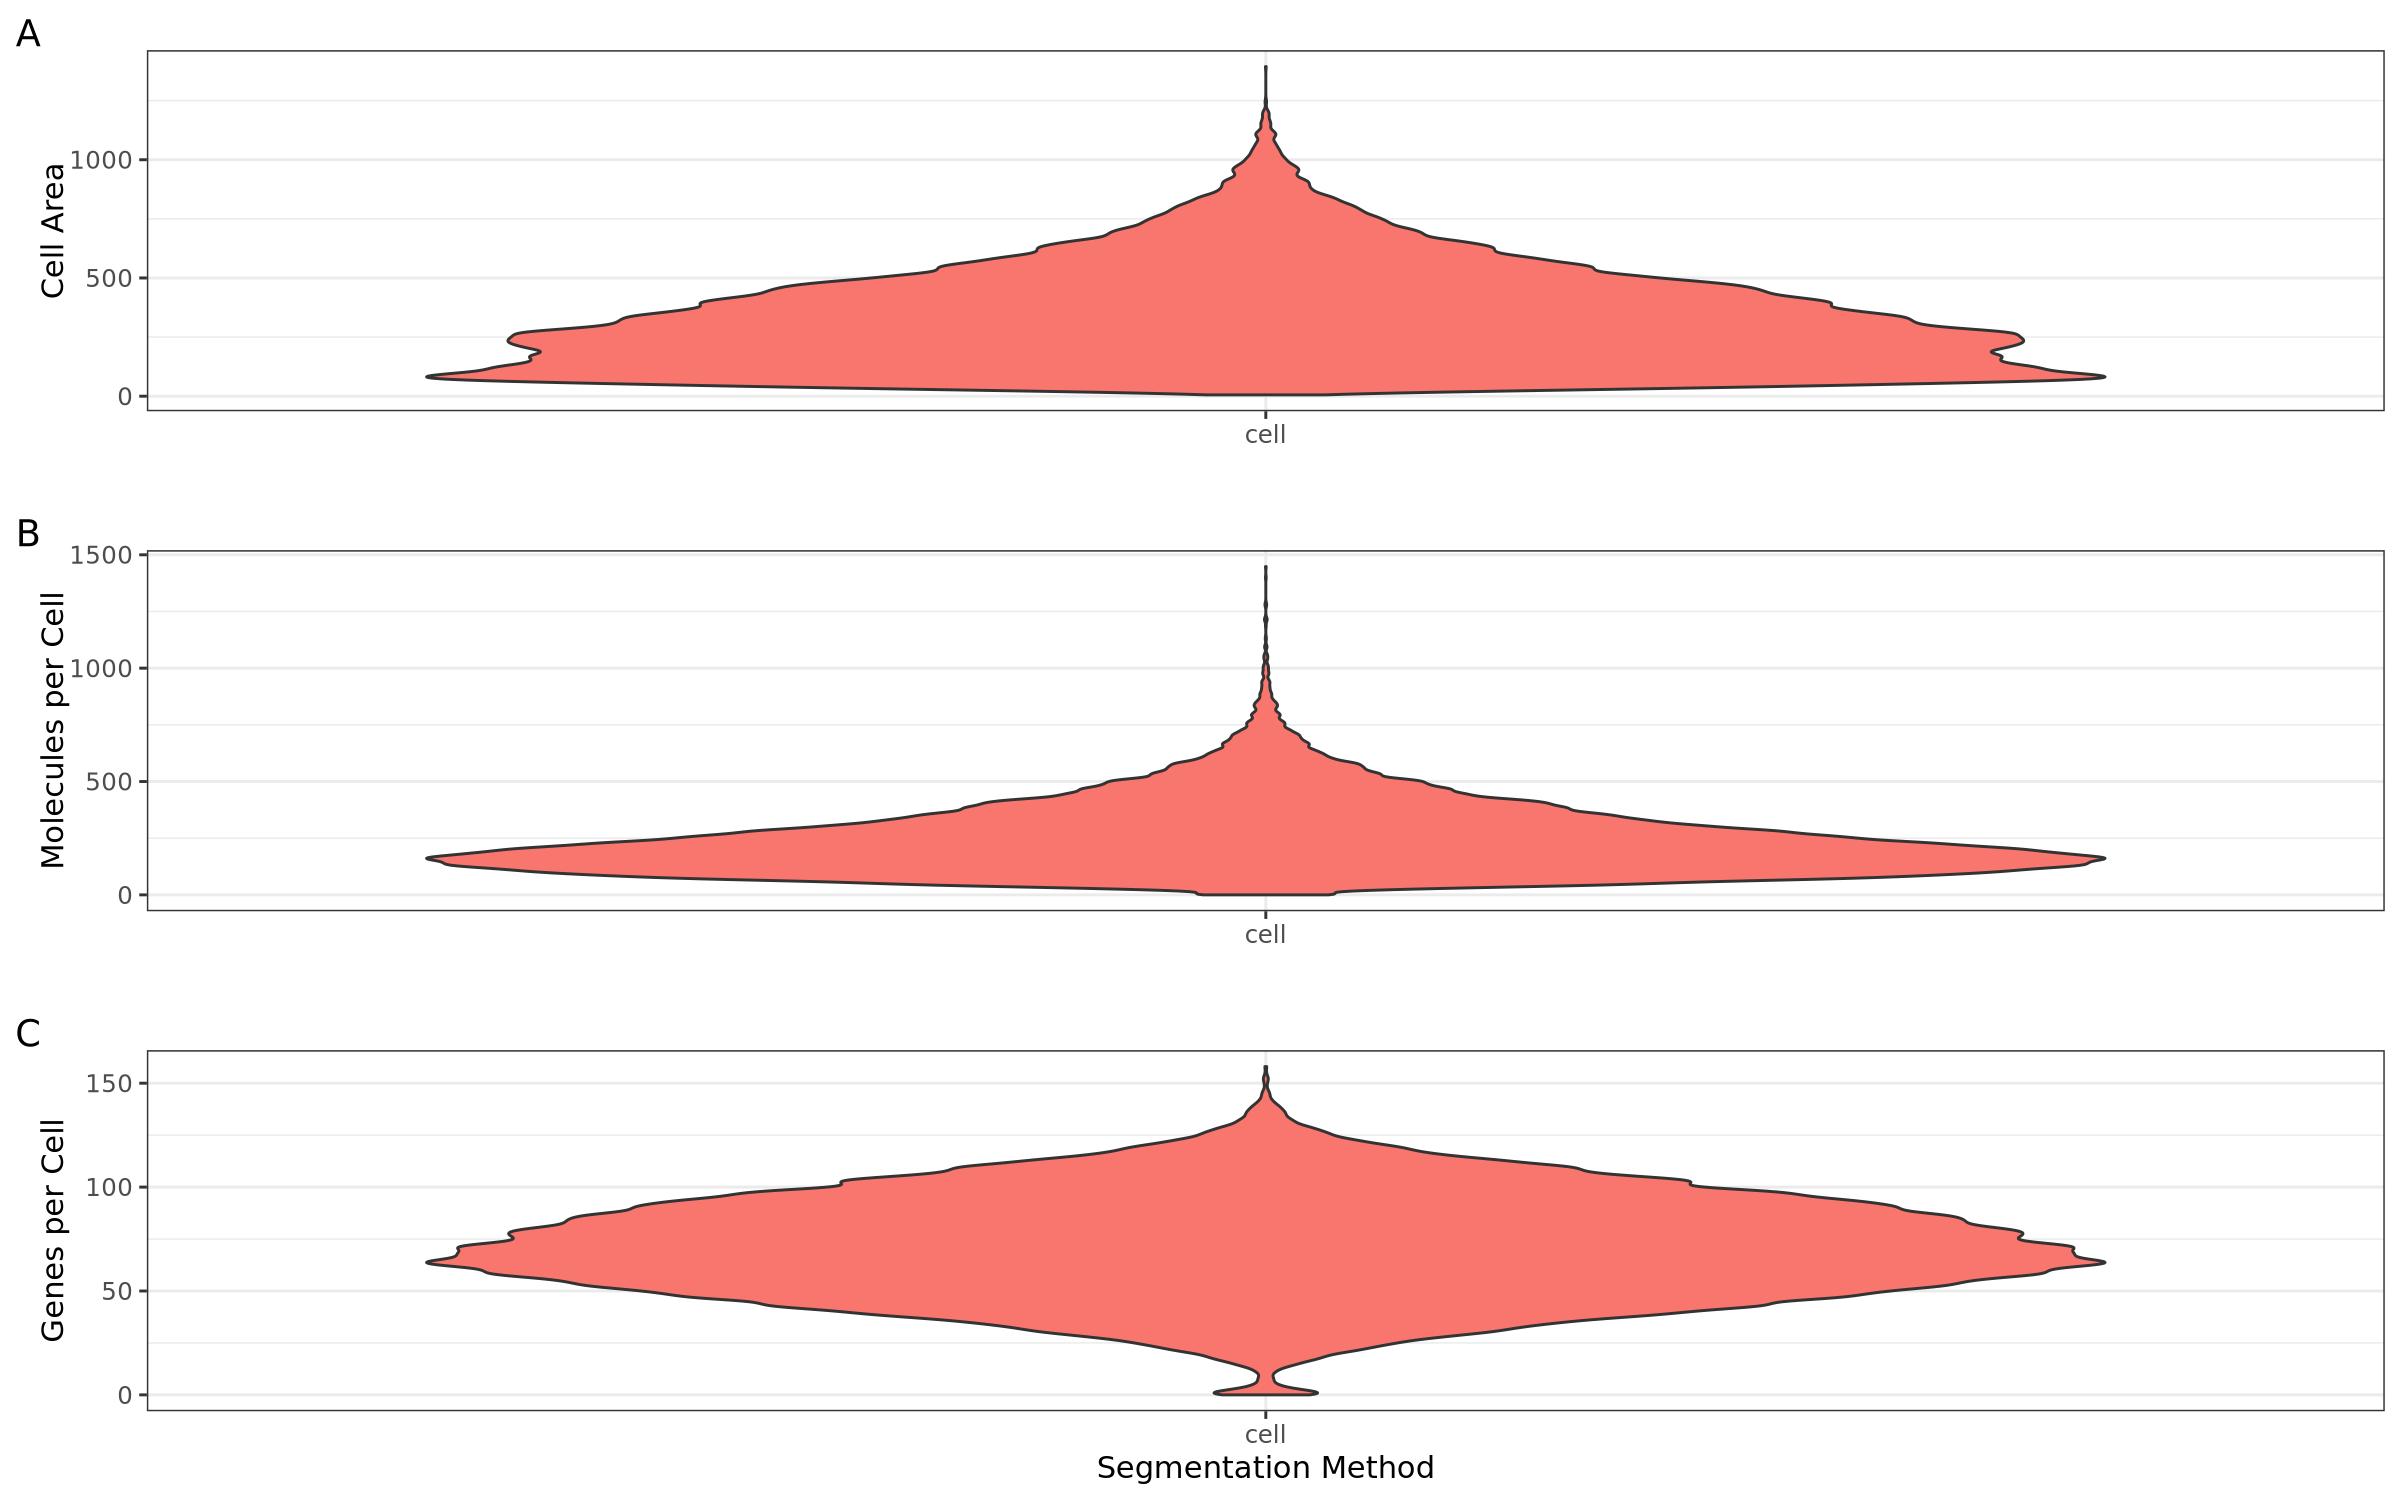

In [10]:

p1 <- ggplot(plt_df, aes(x = segmentation_method, y = cell_area, fill = segmentation_method)) + geom_violin(scale = "width", adjust = 0.5) +
    xlab("Segmentation Method") + ylab("Cell Area") + labs(tag = "A") + theme_bw()
p2 <- ggplot(plt_df, aes(x = segmentation_method, y = nCount_Xenium, fill = segmentation_method)) + geom_violin(scale = "width", adjust = 0.5) + 
    xlab("Segmentation Method") + ylab("Molecules per Cell") + labs(tag = "B") + theme_bw()
p3 <- ggplot(plt_df, aes(x = segmentation_method, y = nFeature_Xenium, fill = segmentation_method)) + geom_violin(scale = "width", adjust = 0.5) +
    xlab("Segmentation Method") + ylab("Genes per Cell") + labs(tag = "C") + theme_bw()

plot_grid(
  p1 + theme(legend.position = "none", axis.title.x = element_blank()),
  p2 + theme(legend.position = "none", axis.title.x = element_blank()),
  p3 + theme(legend.position = "none"), 
  ncol=1, 
  align = 'vh'
)

Bar chart showing the proportion of cells identified by the various segmentation methods for each cluster. Cluster 19 shows an increase in proportion of cells segmented by 0.25x E-Cad. Where as the N/A cells show an increase in the proportion of cells identified by the nuclear expansion method. 

`summarise()` has grouped output by 'xenium_clusters'. You can override using
the `.groups` argument.


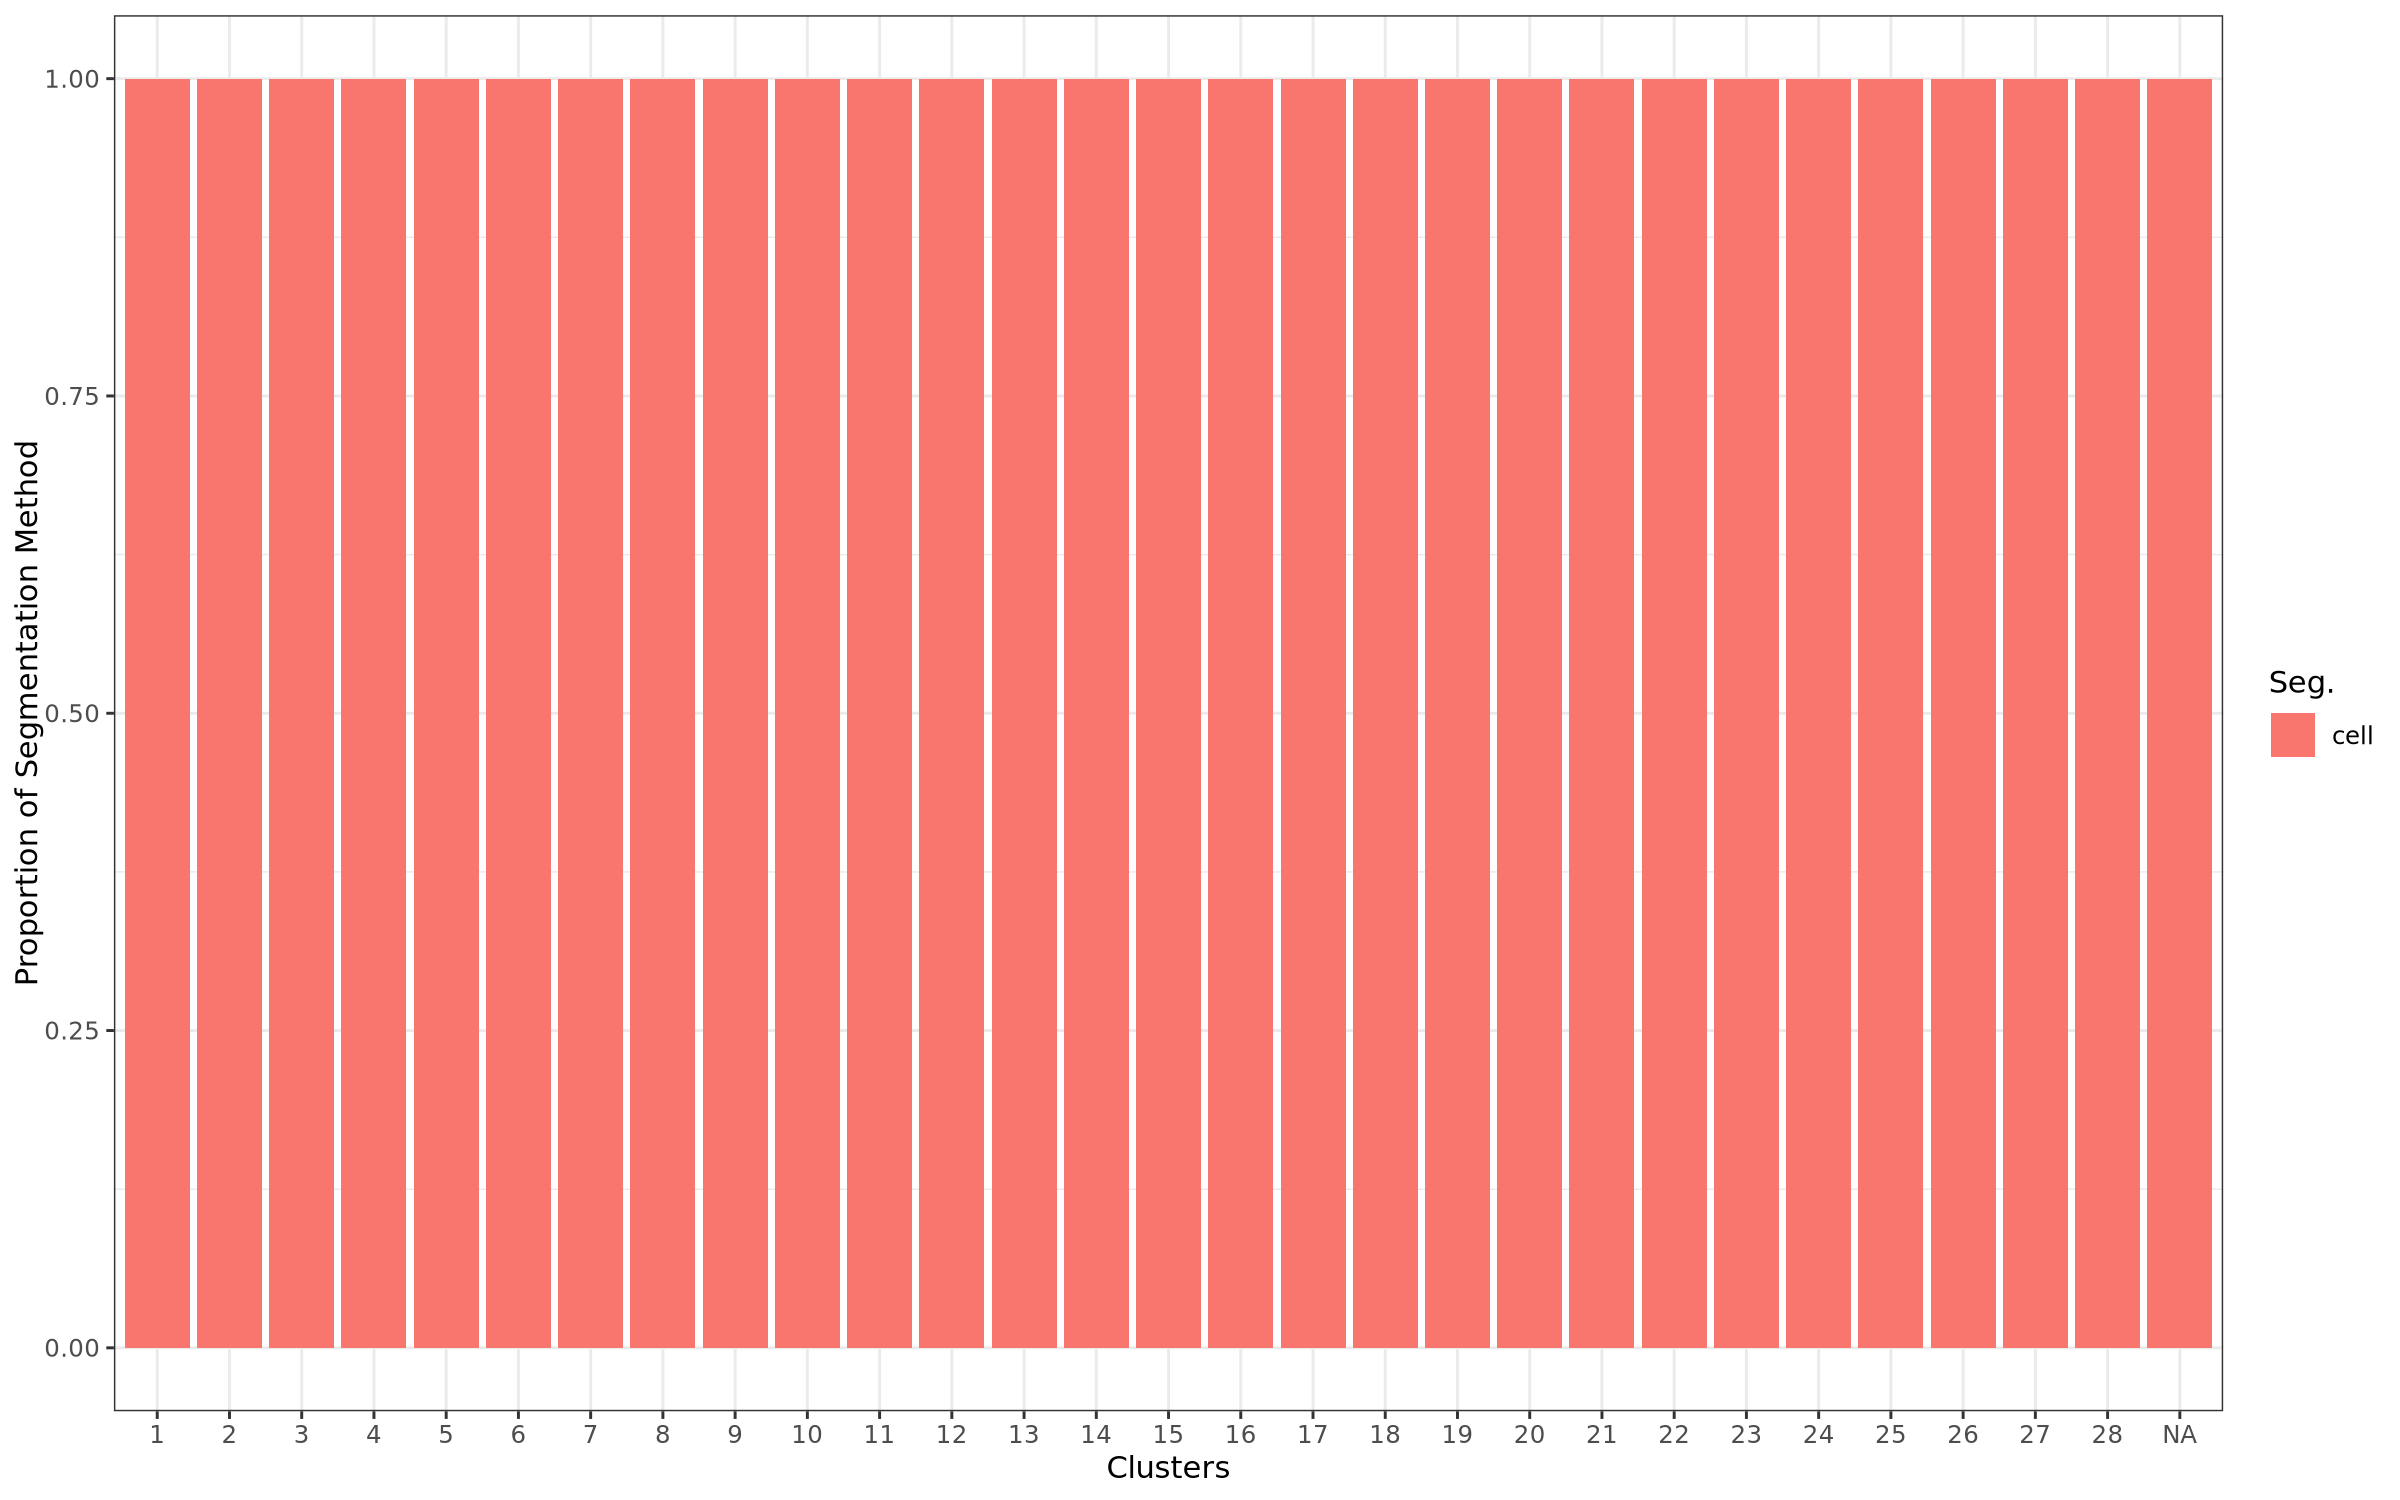

In [11]:
plt_df |> group_by(xenium_clusters, segmentation_method) |> 
  summarise(count = n()) |> 
  group_by(xenium_clusters) |> 
  mutate(proportion = count / sum(count)) -> bar_df

ggplot(bar_df, aes(x = xenium_clusters, y = proportion, fill = segmentation_method)) + geom_col(stat="identity") +
  xlab("Clusters") + ylab("Proportion of Segmentation Method") + labs(fill = "Seg.") + theme_bw()

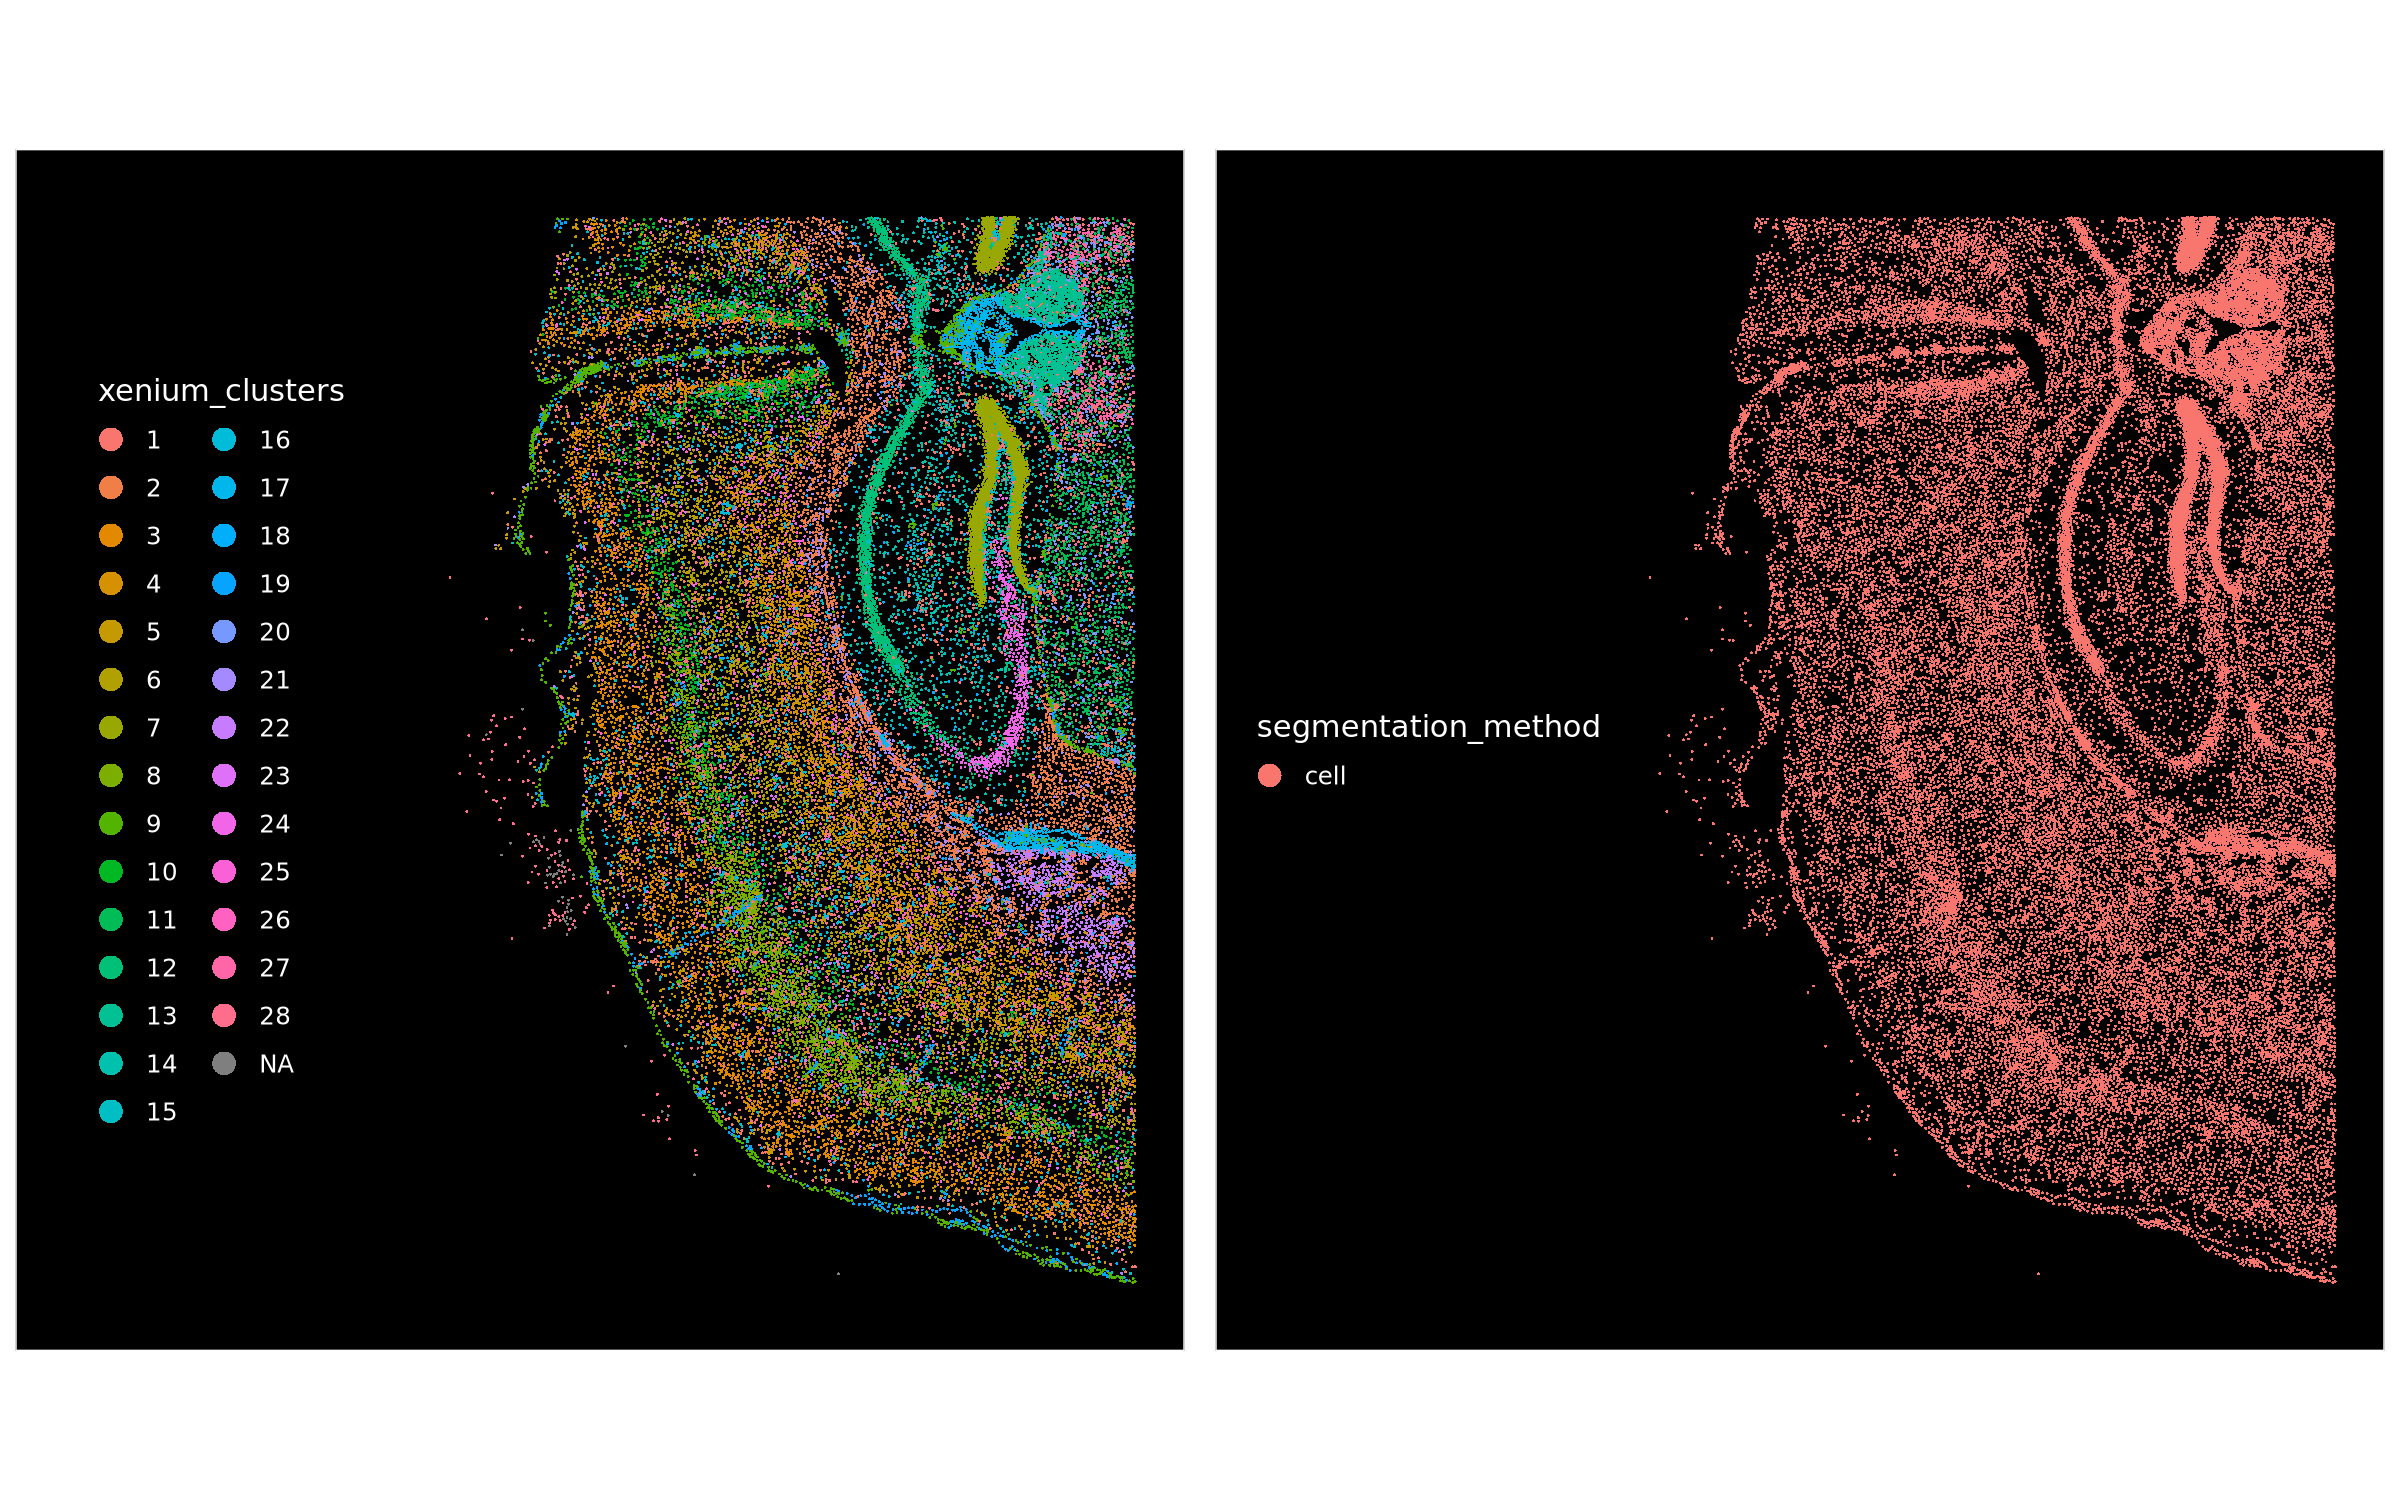

In [12]:
p1 <- ImageDimPlot(xen, group.by = "xenium_clusters") + theme(legend.position = "left")
p2 <- ImageDimPlot(xen, group.by = "segmentation_method") + theme(legend.position = "left")
plot_grid(p1, p2, align = "vh")

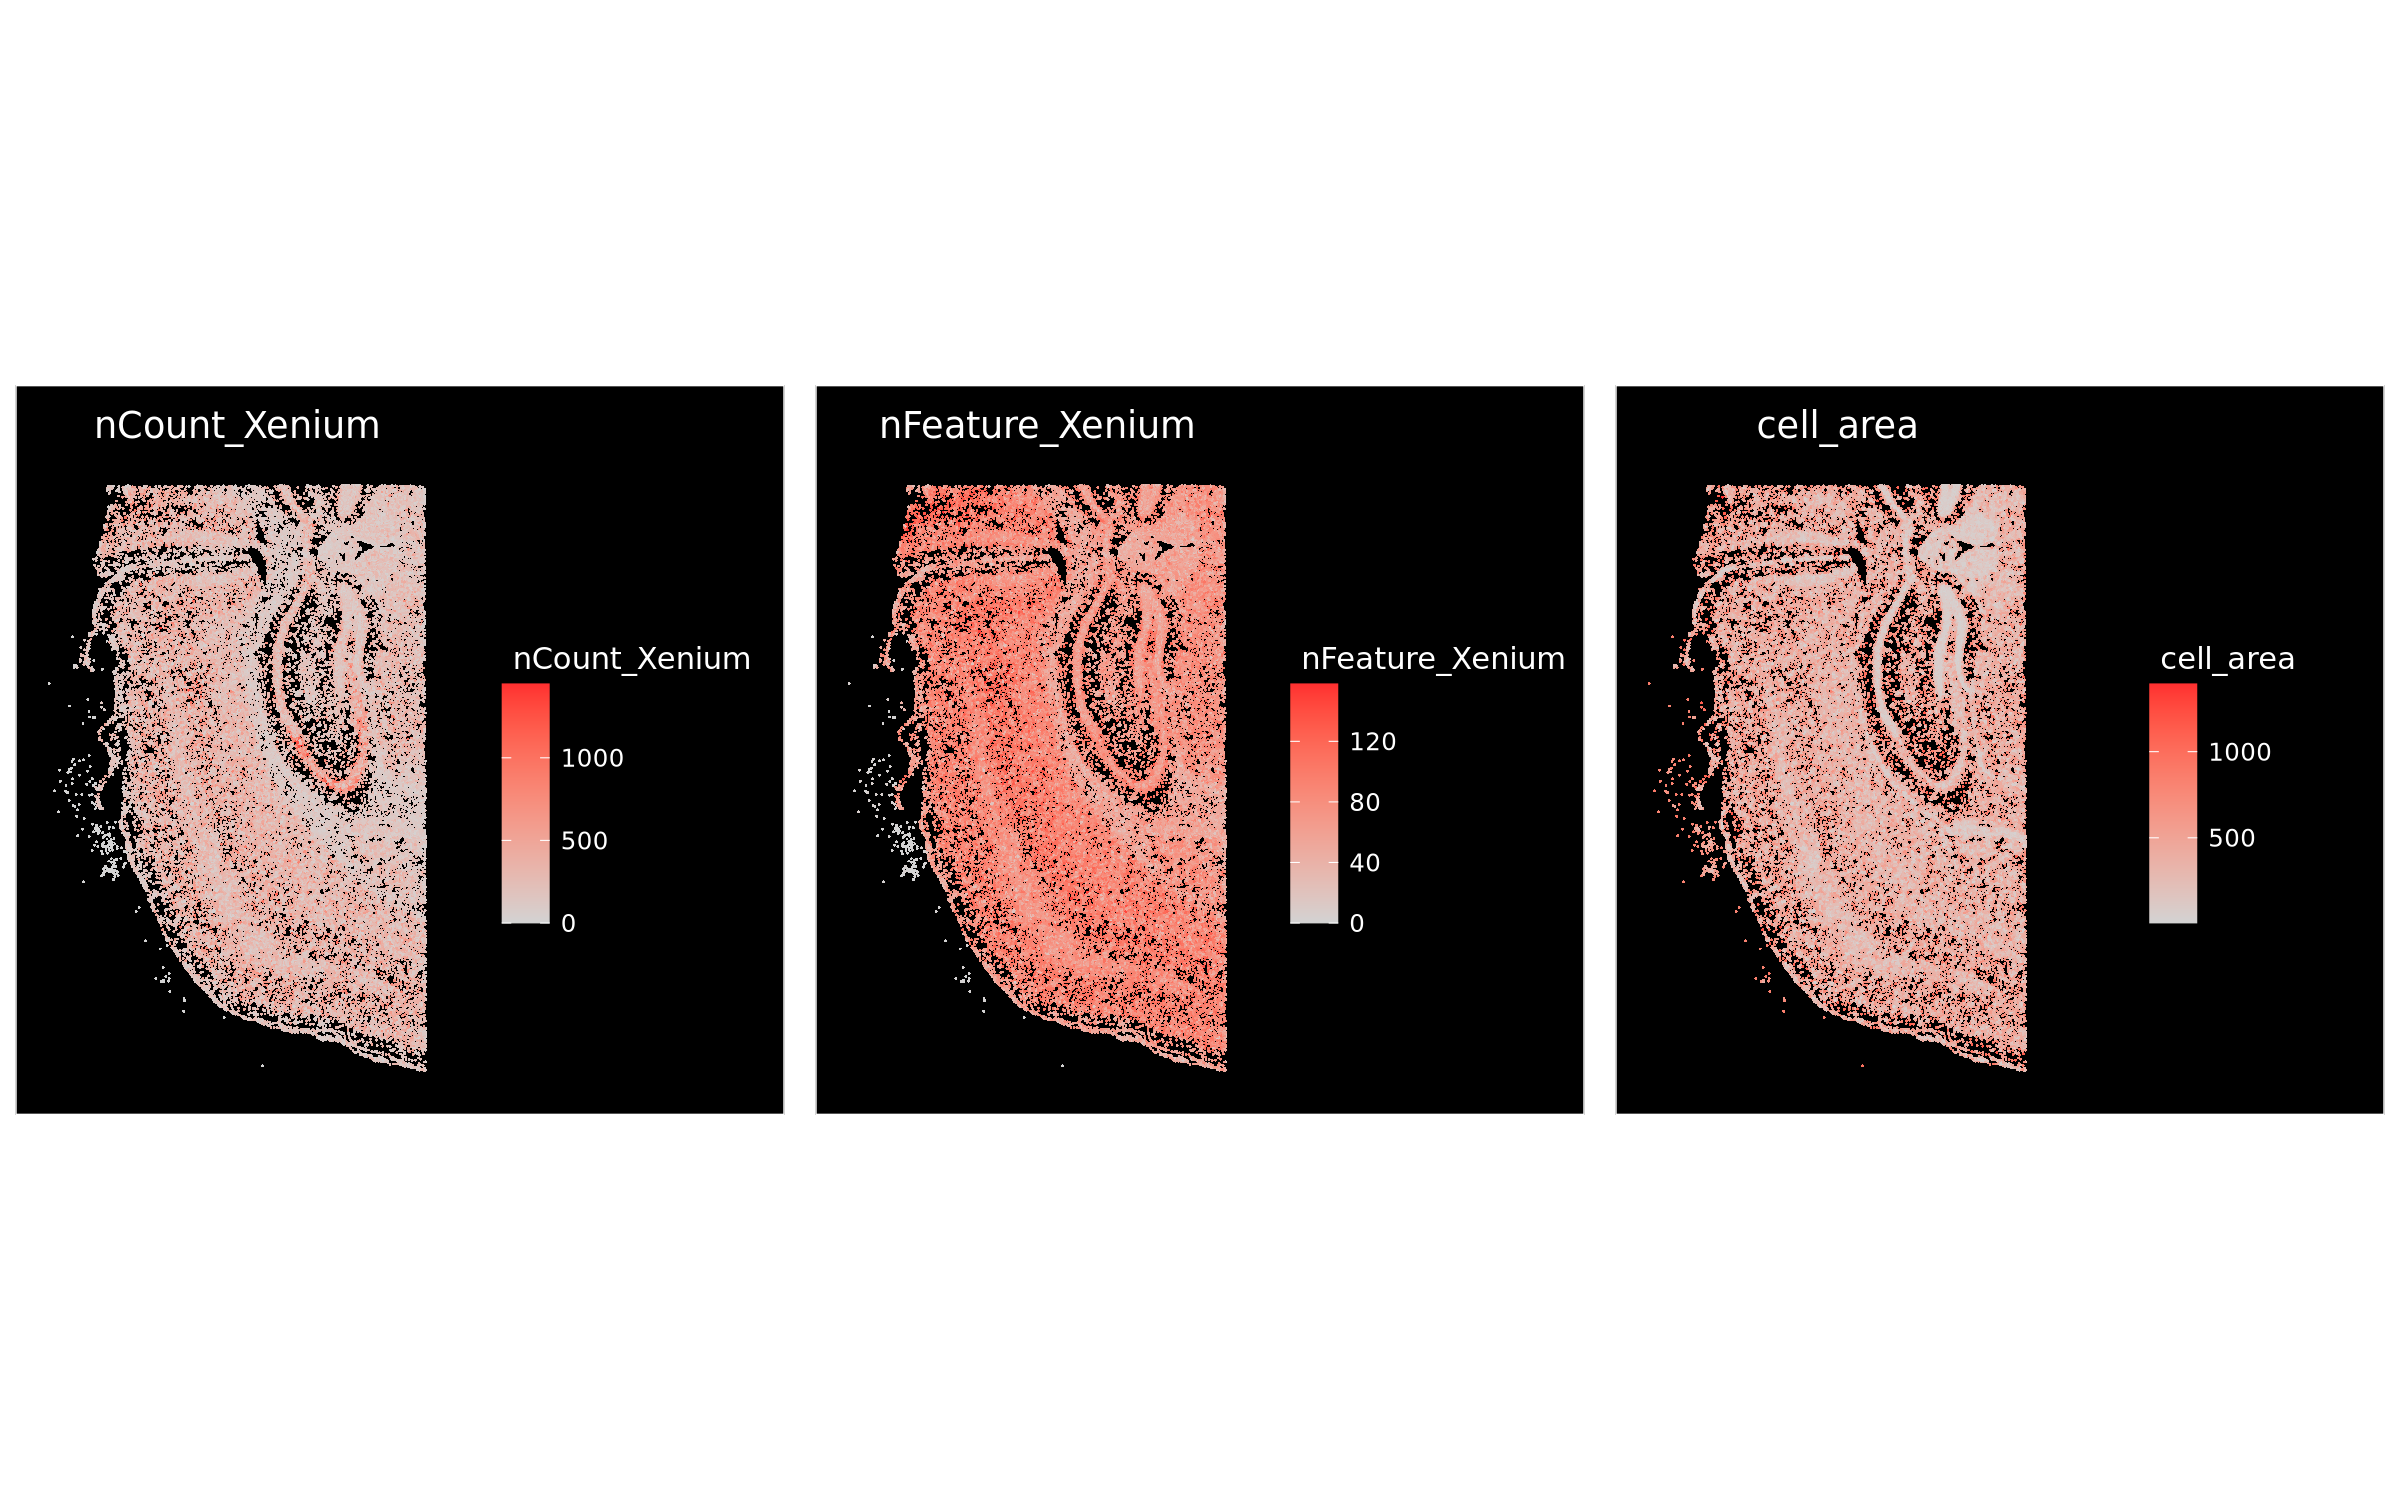

In [30]:
p1 <- ImageFeaturePlot(xen, features = "nCount_Xenium")
p2 <- ImageFeaturePlot(xen, features = "nFeature_Xenium")
p3 <- ImageFeaturePlot(xen, features = "cell_area")
plot_grid(p1, p2, p3, align = "vh", nrow = 1)

In [13]:
p1 <- ImageDimPlot(subset(x = xen, segmentation_method == "0.25x E-Cad"), group.by = "segmentation_method", shuffle = TRUE)
p2 <- ImageDimPlot(subset(x = xen, segmentation_method == "E-Cad"), group.by = "segmentation_method", shuffle = TRUE)
p3 <- ImageDimPlot(subset(x = xen, segmentation_method == "18s"), group.by = "segmentation_method", shuffle = TRUE) 
p4 <- ImageDimPlot(subset(x = xen, segmentation_method == "Nucleus Exp."), group.by = "segmentation_method", shuffle = TRUE)

plot_grid(p1, p2, p3, p4, align = "vh", ncol = 2, nrow = 2)

ERROR: [1m[33mError[39m in `subset()`:[22m
[33m![39m No cells found


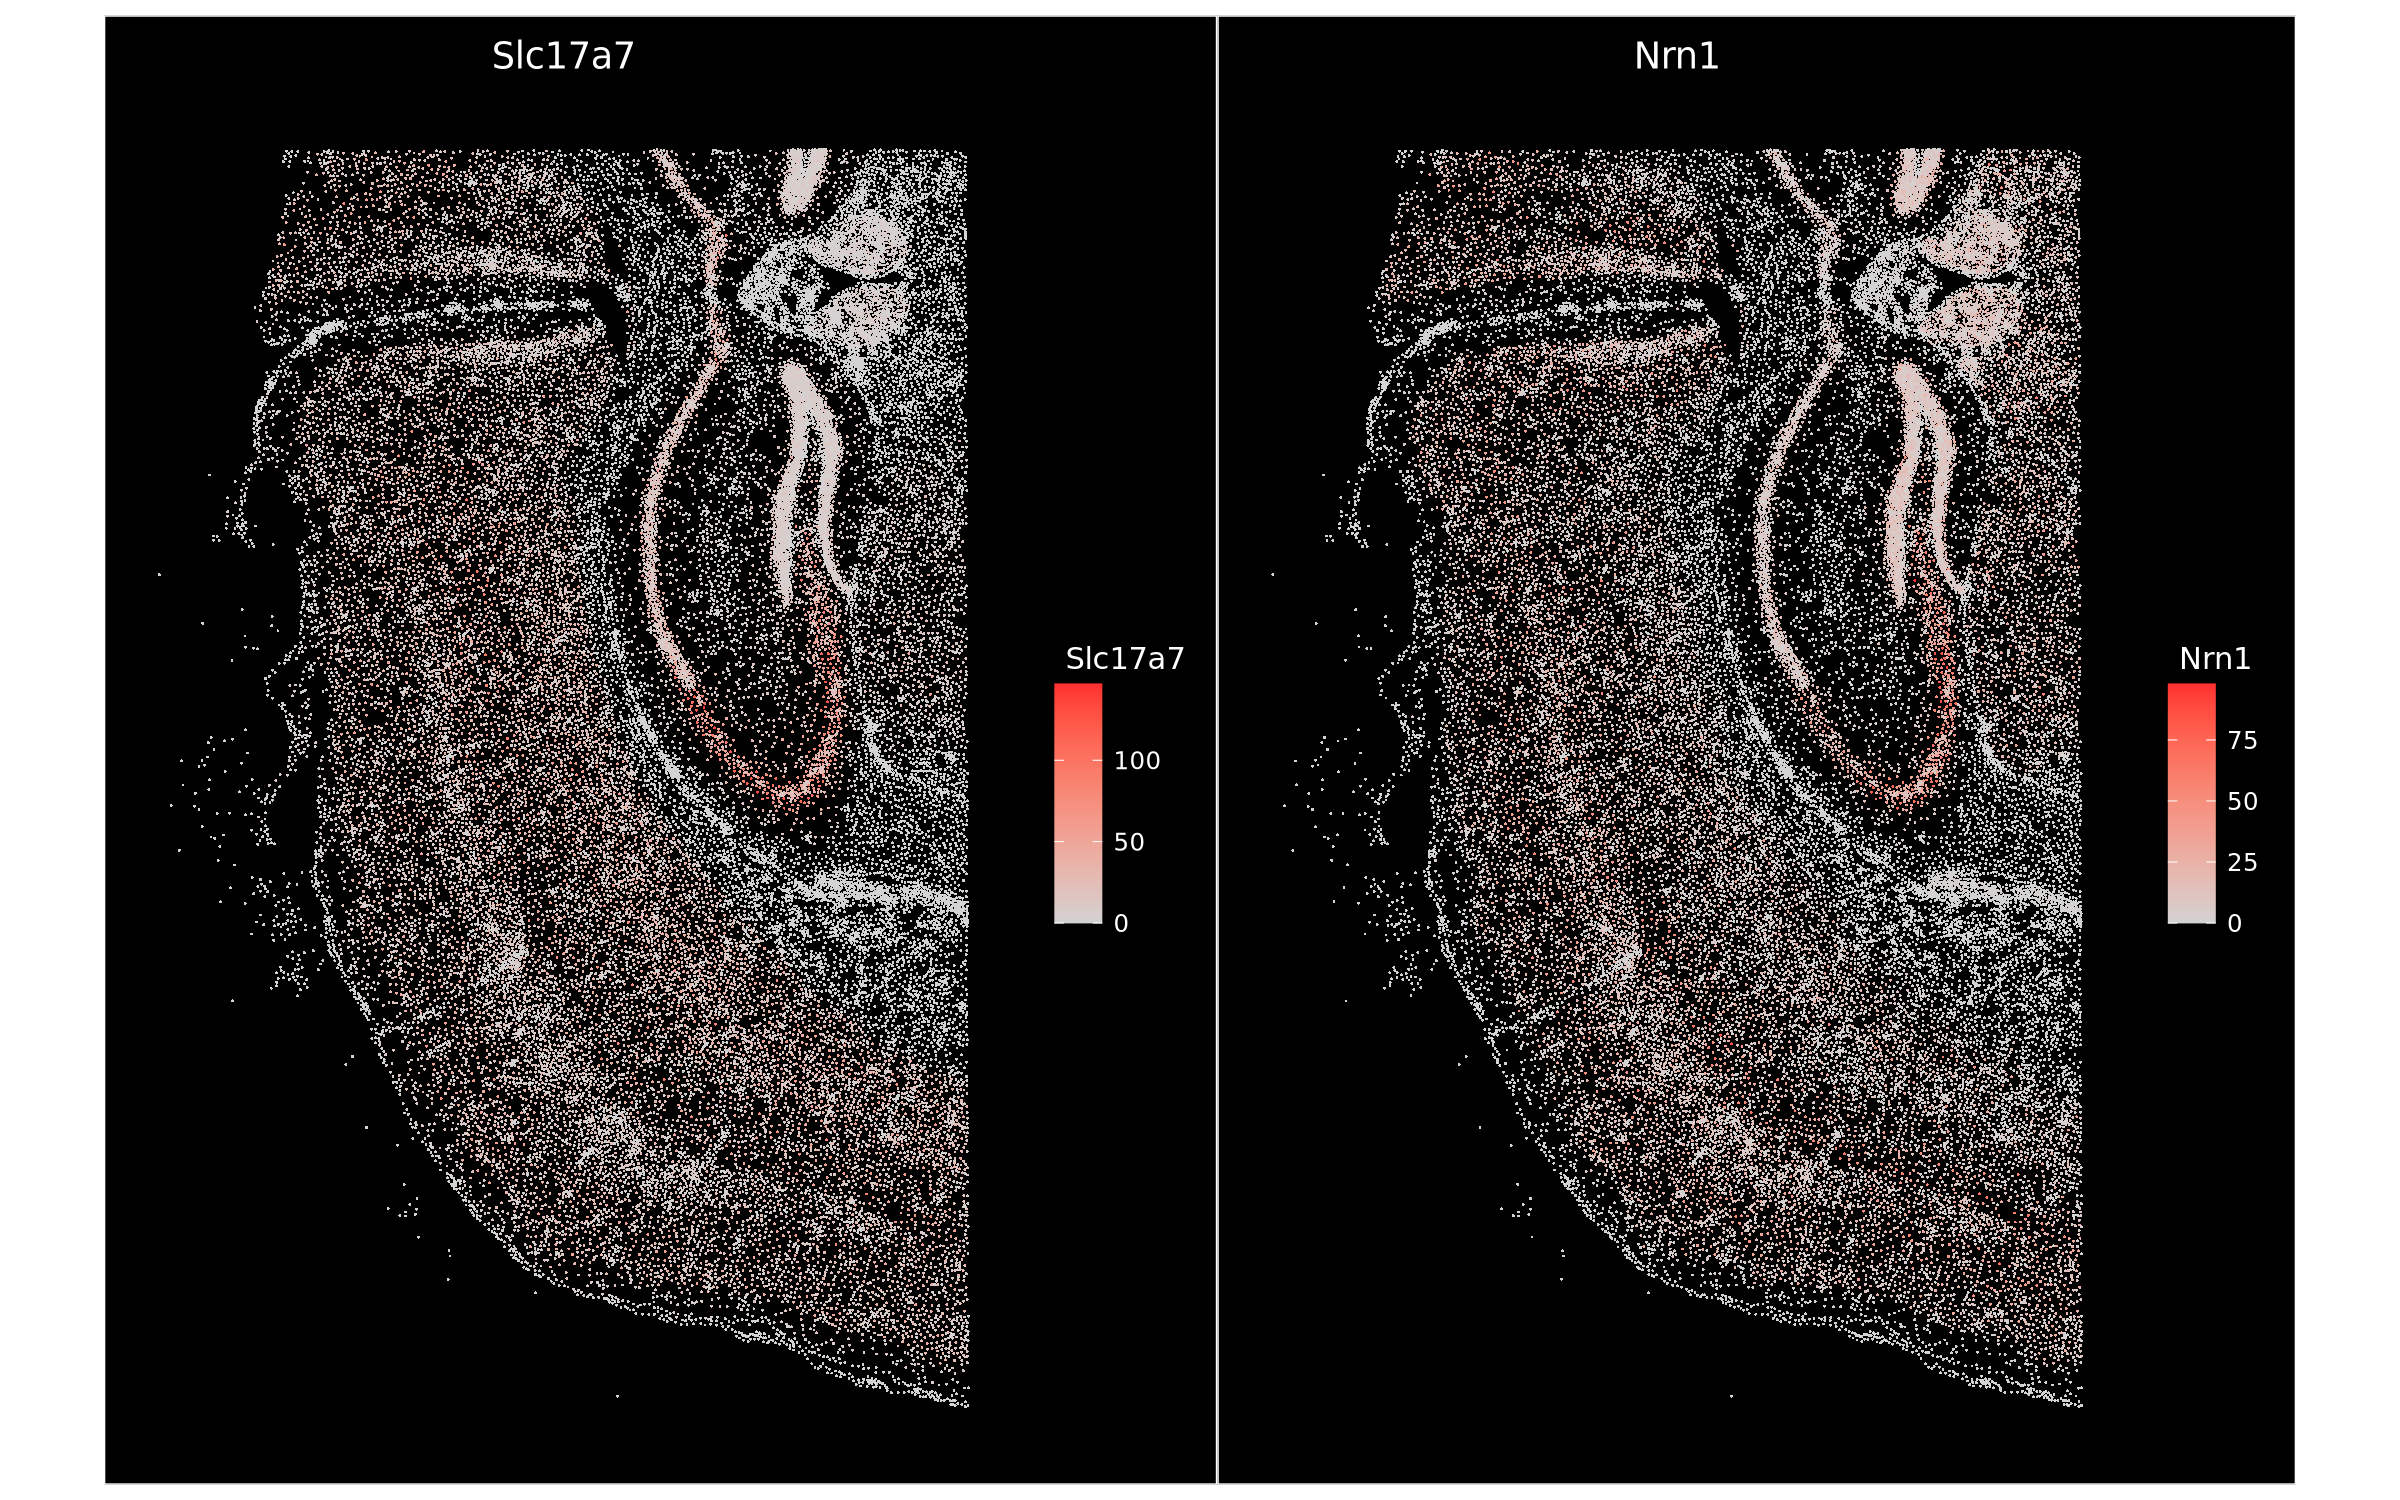

In [14]:
#These genes were chosen at random.
top_2_genes <- names(sort(rowSums(xen[["Xenium"]]$counts), decreasing = TRUE))[1:2]
ImageFeaturePlot(object = xen, features = top_2_genes)

I would like to regenerate these spatial plots with an image of the tissue section overlayed. This is possible with Seurat but seems to be very resource intensive even with the downsampled dataset. Will need to look into and continue trying to generate the plots.

Lets cluster the data and look at a UMAP.

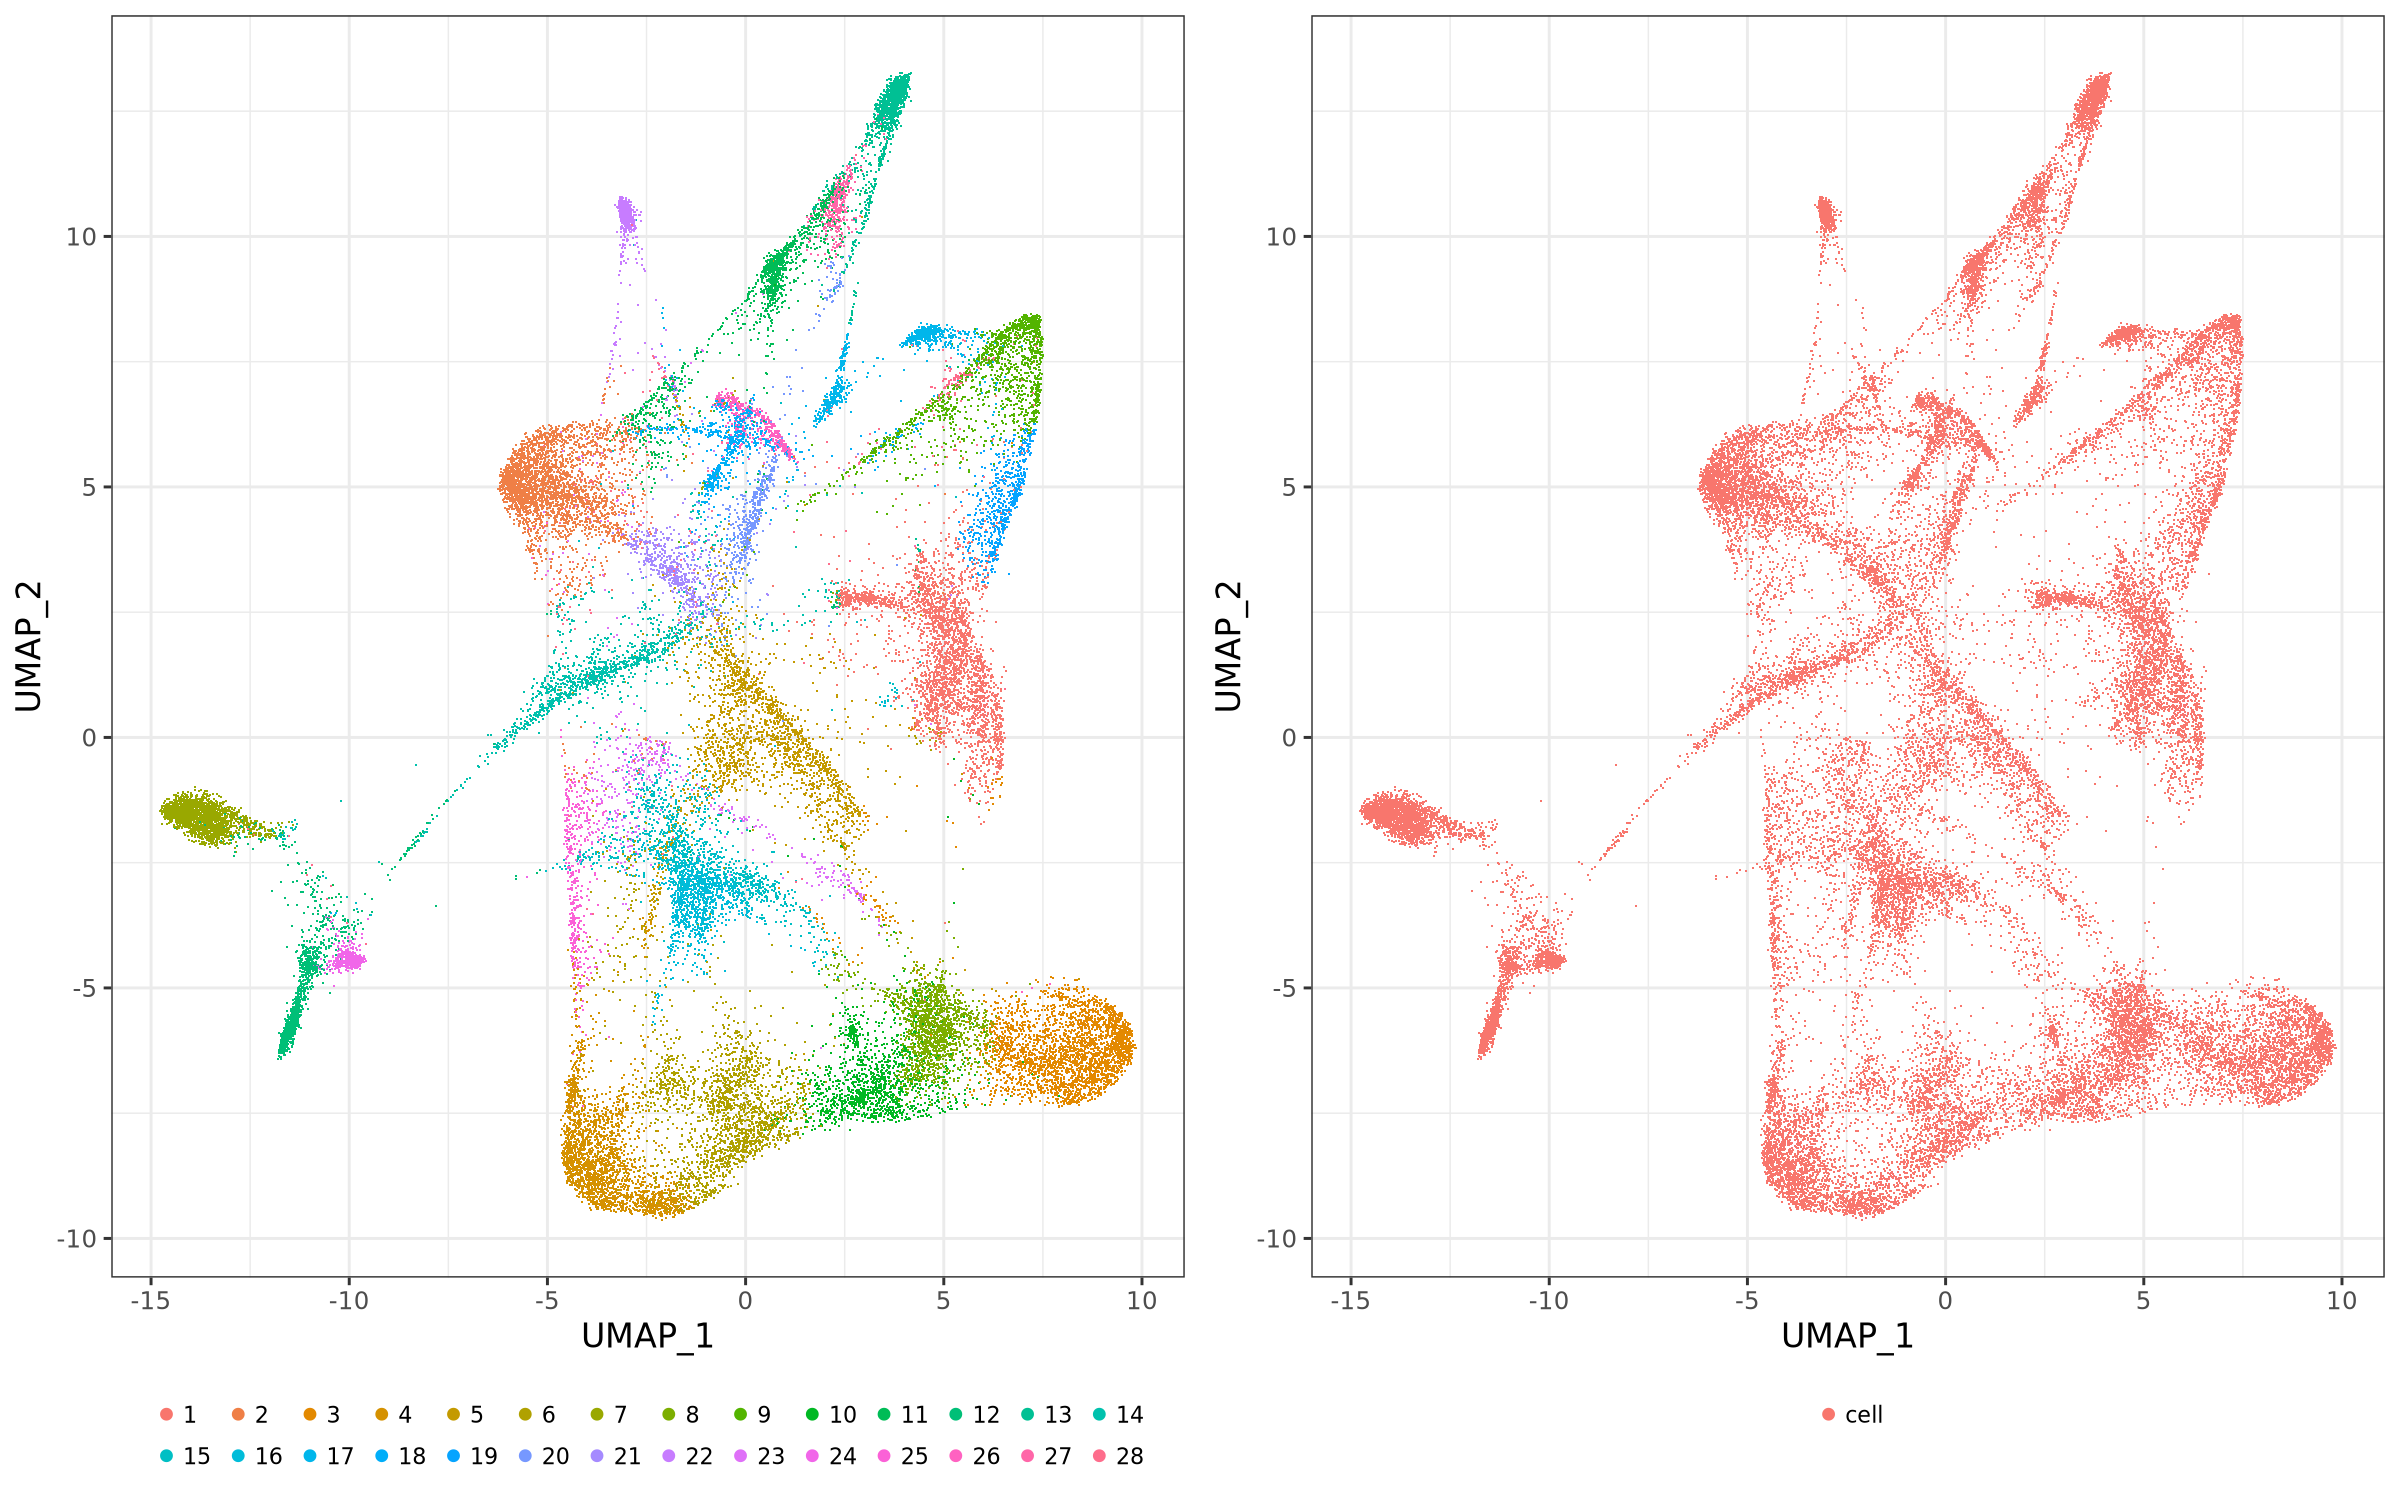

In [15]:
umap_df <- as.data.frame(xen@reductions$xenium_umap@cell.embeddings)
umap_df$cell_id <- row.names(umap_df)
umap_df <- dplyr::left_join(x = umap_df, y = xen[[]], by = "cell_id" )
umap_df <- umap_df[sample(nrow(umap_df)), ]

p1 <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2, color = xenium_clusters)) + geom_point(shape = '.') +
    guides(colour = guide_legend(override.aes = list(shape = "circle"), nrow = 2, byrow = TRUE)) +
    theme_bw() + theme(
        legend.position = "bottom",
        legend.key = element_rect(colour = NA, fill = NA),
        legend.key.size = unit(10, "pt"),
        legend.key.spacing.x = unit(5, "pt"),
        legend.key.spacing.y = unit(5, "pt"),
        legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
        legend.title = element_blank(),
        title = element_text(size = 12)
)

p2 <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2, color = segmentation_method)) + geom_point(shape = '.') +
    guides(colour = guide_legend(override.aes = list(shape = "circle"), nrow = 2, byrow = TRUE)) +
    theme_bw()+ theme(
        legend.position = "bottom",
        legend.key = element_rect(colour = NA, fill = NA),
        legend.key.size = unit(10, "pt"),
        legend.key.spacing.x = unit(5, "pt"),
        legend.key.spacing.y = unit(5, "pt"),
        legend.text = element_text(size = 8, margin = margin(t = 1, r = 1, b = 1, l = 1)),
        legend.title = element_blank(),
        title = element_text(size = 12)
)

plot_grid(p1, p2, align = "vh")

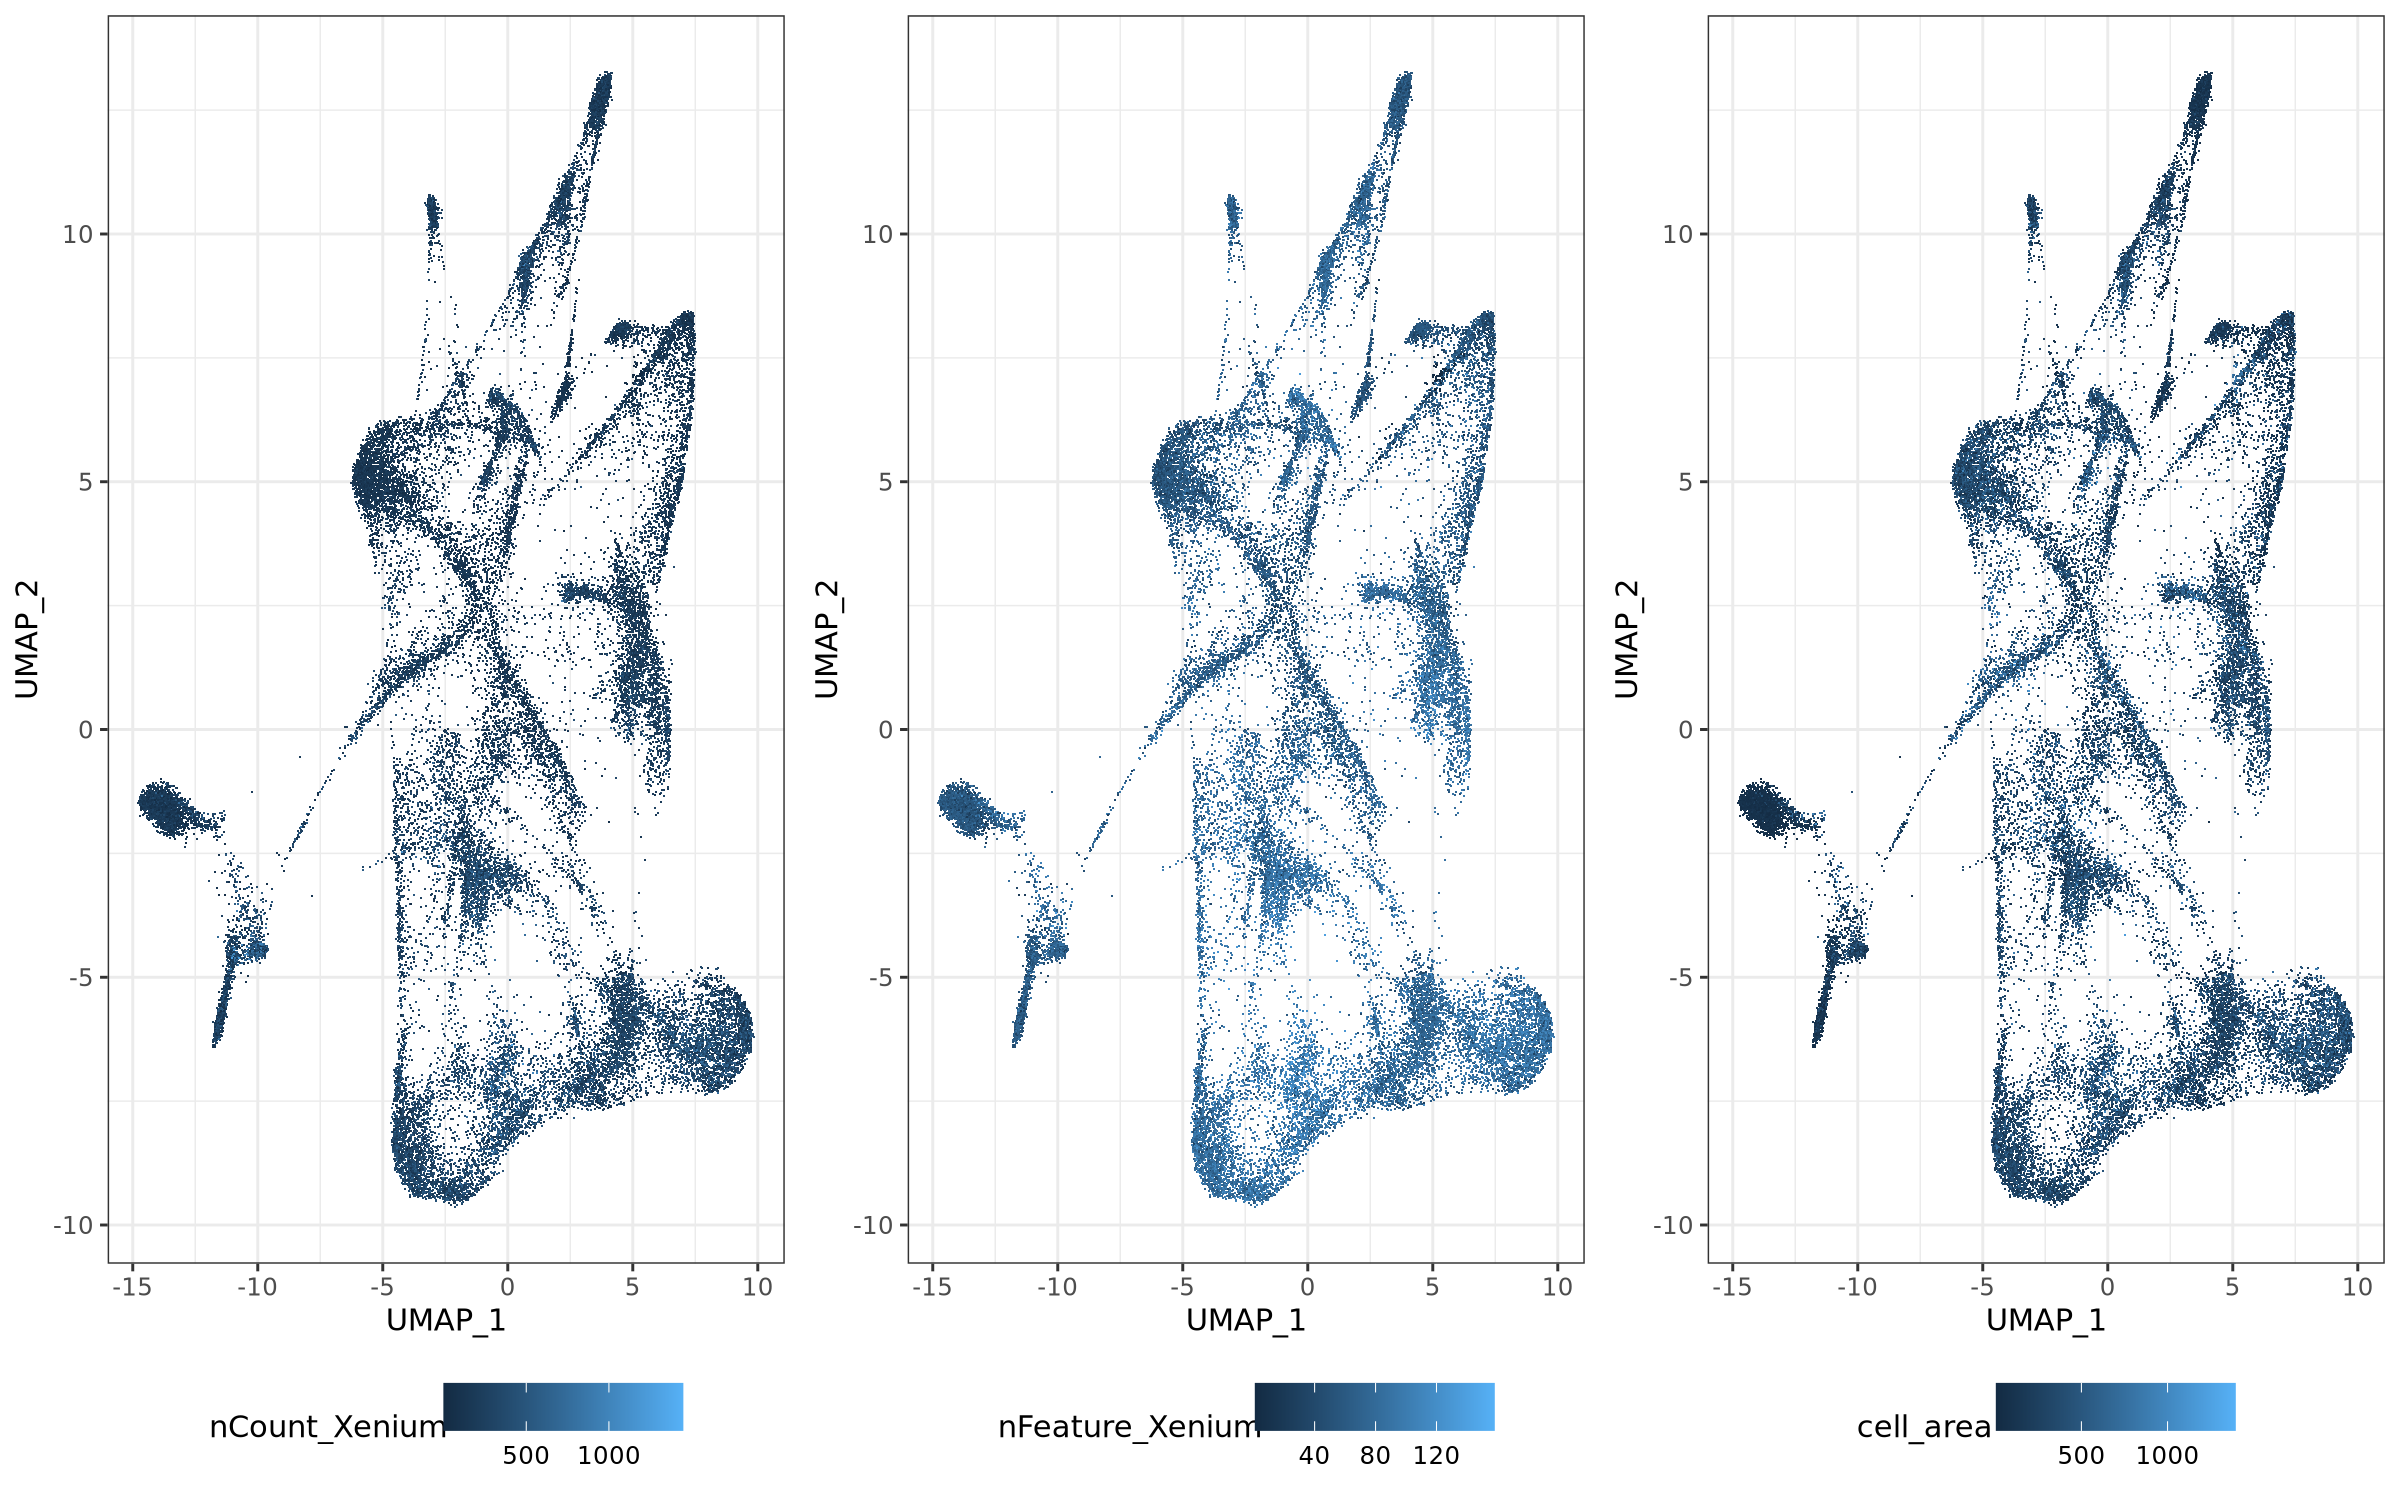

In [40]:
umap_df <- as.data.frame(xen@reductions$xenium_umap@cell.embeddings)
umap_df$cell_id <- row.names(umap_df)
umap_df <- dplyr::left_join(x = umap_df, y = xen[[]], by = "cell_id" )
umap_df <- umap_df[sample(nrow(umap_df)), ]

p1 <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2, color = nCount_Xenium)) + geom_point(shape = '.') +
    theme_bw() + theme(legend.position = "bottom")

p2 <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2, color = nFeature_Xenium)) + geom_point(shape = '.') +
    theme_bw()+ theme(legend.position = "bottom")

p3 <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2, color = cell_area)) + geom_point(shape = '.') +
    theme_bw() + theme(legend.position = "bottom")

plot_grid(p1, p2, p3, align = "vh", nrow = 1)